<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="120" /></center>

<center><img src="https://github.com/jmps967/INSAID-CapstoneProject-2-ML/blob/master/Image/companylogo.png?raw=true" width="700" height="300" /></center>



<font color='blue'> 
# Capstone Project : HR Analytics : - <font color='maroon'> Data Analytics and Machine Learning #
</font>

<font color='green'> 
## Group : 1001 ## 
</font>

# **Table of Contents**

1. [Introduction](#Section1)<br>
2. [Problem Statement](#Section2)<br>
3. [Installing & Importing Libraries](#Section3)<br>
4. [Data Acquisition & Description](#Section4)<br>
5. [Data Pre-processing](#Section5)<br>
6. [Data Visualisation](#Section6)<br>
7. [Data Post-Processing](#Section7)<br>
    7.1 [Pre-Processing Pipeline](#Section71)<br>  
8. [Model Development & Evaluation](#Section8)<br>
    8.1 [Feature Selection](#Section81)<br>
     - 8.1.1 [Logisitc Regression](#Section811)<br>
     - 8.1.2 [Random Forest Classifier](#Section812)<br>
     
  8.2 [Handling Imbalance data](#Section82)<br>
     - 8.2.1 [Approach-1:Using stratify](#Section821)<br>
     - 8.2.2 [Approach-2:Using SMOTE](#Section822)<br>
     - 8.2.3 [Approach-3:Using 10 Fold Cross Validation](#Section823)<br>
     - 8.2.4 [Approach-4:Using Hyper Parameter Tuning](#Section824)<br>
    
  8.3 [Handling Base (Balance) data](#Section83)<br>
     - 8.3.1 [Approach-5](#Section831)<br>
9. [Conclusion](#Section9)<br>


<a id = Section1></a>
<font color='brown'>
# **1. Introduction** #
</font>


In this world of competition, employees are more focused towards their faster growth and trying options for the same.
Every company is more focused towards employee satisfaction and retention. **INSAIDIANS** are a leading partnership firm who is helping companies to resolve their employee related issues through partnership with the respective HR department.

With the similar kind of problem, one of the leading **software company** was struggling with employee retention and satisfaction. Since the company was not equipped with scientific analysis tools, they have approached **INSAIDAN** for the expert help and model building which will help the company HR team to take timely action on employee related concerns.


**INSAIDIAN** team has core expertise with respect to employee retention and their approach towards the problem is:



<center><img src="https://github.com/jmps967/INSAID-CapstoneProject-2-ML/blob/master/Image/employee-retention-strategy.png?raw=true" width="1020" height="520" /></center>

<a id = Section2></a>
<font color='brown'>
# **2. Problem Statement**
</font>

The **software company** is facing issues with respect to leaving employee. Lately they lost many talented employee and company HR faced issues with retaining them. To overcome the issues of employee retention, company has decided to explore innovative ways, so that they can retain their productive and talented resources.

To resolve their issues, they have hired **INSAIDIAN** to work upon root cause and predict the future implications with respect to employee stay in the company or leave the company? For that company has provided history of the permanent employee data with department information. 

**INSAIDIAN** job in hand is to predict the likelihood of the employee who has high chances of leaving the company. With this predicted information **HR** of **software company** can be proactive in their action and reaching out to them before it's too late. 


<center><img src="https://github.com/jmps967/INSAID-CapstoneProject-2-ML/blob/master/Image/toxic-work-cultures.png?raw=true" width="1020" height="520" /></center>


To tackle this situation of crisis, **company** have appointed **team of data science counsultant from INSAIDIAN** who can help in exit interview with more proactive approach.

### Why HR needs help from **INSAIDIAN**? ###

Now the question is how this problem could be solved using data science? While there are many ways to prevent the situation. Let's walk through a simple pave how this team handled problem of **employee retaintion with the help of machine learning model.**

The **target feature** in the acquired data set is **status** over the employement history data.

|Target Feature|Potential Values|
| :-- | :-- |
|status| Left|
|| Emploee|


<a id = Section3></a>

<font color='brown'> 
# **3. Installing & Importing Libraries**
</font>

## Establishing the SQL connection ##

<center><img src="https://github.com/jmps967/INSAID-CapstoneProject-2-ML/blob/master/Image/setup_learn_sql_mac_thumb1200_4-3.jpg?raw=true" width="1020" height="520" /></center>


### <u>Steps<u> : -  ###

1) Fetching the database name. 
2) Coloumn name 

In [ ]:
!pip install mysql

In [ ]:
!pip install mysql.connector

<center><img src="https://github.com/jmps967/INSAID-CapstoneProject-2-ML/blob/master/Image/how-it-works-compressed-new.gif?raw=true" width="720" height="350" /></center>

In [ ]:
import mysql.connector
from mysql.connector import Error
import pandas as pd

try:
    connection = mysql.connector.connect(host='cpanel.insaid.co',
                                         database='Capstone2',
                                         user='student',
                                         password='student')
    
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        print("\n")
        
        cursor.execute("USE Capstone2")
        cursor.execute("SHOW TABLES")
        for (table_name,) in cursor:
            print(table_name)
        print("\n")
        
except Error as e:
    print("Error while connecting to MySQL", e)
finally:
    if (connection.is_connected()):
        cursor.close()
        connection.close()
        print("MySQL connection is closed")

 ## Fetching datatable and save in csv format  ##
 
 
 <center><img src="https://github.com/jmps967/INSAID-CapstoneProject-2-ML/blob/master/Image/SQLSERVER_SYSTEM-DATABASE.gif?raw=true" width="720" height="350" /></center>

In [ ]:
import mysql.connector
from mysql.connector import Error
import pandas as pd

try:
    connection = mysql.connector.connect(host='cpanel.insaid.co',
                                         database='Capstone2',
                                         user='student',
                                         password='student')
    
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        print("\n")
        
        cursor.execute("USE Capstone2")
        cursor.execute("SHOW TABLES")
        for (table_name,) in cursor:
            print(table_name)
        print("\n")
        
# export  department_data table in csv format
        sql_select_Query = "select * from department_data"
        results = pd.read_sql_query(sql_select_Query, connection)
        results.to_csv("department_data.csv", index=False)
        print("Sucessfully exported table department_data")
        
# export  employee_data table in csv format
        sql_select_Query = "select * from employee_data"
        results = pd.read_sql_query(sql_select_Query, connection)
        results.to_csv("employee_data.csv", index=False)
        print("Sucessfully exported table employee_data")
        
# export  employee_details_data table in csv format
        sql_select_Query = "select * from employee_details_data"
        results = pd.read_sql_query(sql_select_Query, connection)
        results.to_csv("employee_details_data.csv", index=False)
        print("Sucessfully exported table employee_details_data")

# export  model_evaluation_results table in csv format
        sql_select_Query = "select * from model_evaluation_results"
        results = pd.read_sql_query(sql_select_Query, connection)
        results.to_csv("model_evaluation_results.csv", index=False)
        print("Sucessfully exported table model_evaluation_results")
        
# export  model_evaluation_table in csv format
        sql_select_Query = "select * from model_evaluation_table"
        results = pd.read_sql_query(sql_select_Query, connection)
        results.to_csv("model_evaluation_table.csv", index=False)
        print("Sucessfully exported table model_evaluation_table")
        
        
except Error as e:
    print("Error while connecting to MySQL", e)
finally:
    if (connection.is_connected()):
        cursor.close()
        connection.close()
        print("MySQL connection is closed")

### **<u>Installing and Importing Libraries<u>** ###

In [1]:
# Importing libraries:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

# Standard plotly imports
import plotly
#import plotly.plotly as py
! pip install chart_studio
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.set_config_file(offline=True)
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

# To enable pandas profiling
import pandas_profiling 
from pandas_profiling import ProfileReport

<a id = Section4></a>

<font color='brown'> 
# **4. Data Acquisition & Description**
</font>

We have extracted **data for employee and department details** and the link can be retrieved from the attached
- <a href = "https://github.com/jmps967/INSAID-CapstoneProject-2-ML/blob/master/employee_details_data.csv">employee_details_data</a>.

- <a href = "https://github.com/jmps967/INSAID-CapstoneProject-2-ML/blob/master/employee_data.csv">employee_data</a>.

- <a href = "https://github.com/jmps967/INSAID-CapstoneProject-2-ML/blob/master/department_data.csv">department_data</a>.



| Database Name           |  Records  | Features | Dataset Size |
| :--                     |  :--      | :--      | :--          |
| employee_details_data   | 14245     |  4       | 358 KB       | 
| employee_data           | 14150     | 11       | 872 KB       |
| department_data         |    11     |  3       |   1 KB       |




**<u>employee_details_data<u>:-**

| Id | Features | Description |
| :-- | :--| :--| 
|01| **employee_id** | Unique ID Number for each employee|
|02| **age** | Age of the Employee |
|03| **gender** | Gender of the Employee |
|04| **marital_status** | Marital Status of Employee |

**<u>employee_data<u>:-**

| Id | Features | Description |
| :-- | :--| :--| 
|01| **avg_monthly_hrs** | Average number of hours worked per month |
|02| **department** |  Department to which the employees belong(ed) to |
|03| **filed_complaint** | Has the employee filed a formal complaint in the last 3 years? |
|04| **last_evaluation** | Score for most recent evaluation of employee (higher is better) |
|05| **n_projects** | Number of projects employee has worked on|
|06| **recently_promoted** | Was the employee promoted in the last 3 years? |
|07| **salary** | Salary level with respect to rest of their department |
|08| **satisfaction** | Score for employee’s satisfaction with the company (higher is better) |
|09| **status** | Salary level with respect to rest of their department |
|10| **tenure** | Number of years at the company |
|11| **employee_id** | Unique ID Number for each employee |

**<u>department_data<u>:-**

| Id | Features | Description |
| :-- | :--| :--| 
|01| **dept_id** | Unique Department Code |
|02| **dept_name** | Name of the Department |
|03| **dept_head** | Name of the Head of the Department |


<a id = Section4></a>

<font color='brown'> 
## We have used the data files fetched from sql database on 4th July 2020 ##
</font>

In [2]:
## for easy and smooth access of datahandling ... downloaded all the data in local pc and used for further analysis ##
# Loading data from local PC #
import pandas as pd
emp_data = pd.read_csv("employee_data.csv") 
emp_details = pd.read_csv("employee_details_data.csv") 
dept_data = pd.read_csv("department_data.csv")

**Quick view over database**

In [3]:
emp_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.0,NaN,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467
1,134.0,NaN,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707


In [4]:
# Checking for shape of the database:- #
emp_data.shape

(14150, 11)

In [5]:
# Checking for nulls/missing values:- #

emp_data.isnull().sum().sort_values(ascending = False)

recently_promoted    13853
filed_complaint      12104
last_evaluation       1487
department             707
tenure                 150
satisfaction           150
employee_id              0
status                   0
salary                   0
n_projects               0
avg_monthly_hrs          0
dtype: int64

**Data Description**

In this section we will get **information about the data** and see some observations.

In [6]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB


**Observation:**

- We can see that all the **status** has been **identified** as **incorrect** data type i.e. object. But it **should** be        boolean instead.

### **Data Information**

In this section we will see the **information about the types of features**.

In [7]:
emp_data.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id
count,14150.000000,2046.0,12663.000000,14150.000000,297.0,14000.000000,14000.000000,14150.000000
mean,199.994346,1.0,0.718399,3.778304,1.0,0.621212,3.499357,112080.750247
std,50.833697,0.0,0.173108,1.250162,0.0,0.250482,1.462584,8748.202856
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000,0.000000
25%,155.000000,1.0,0.563711,3.000000,1.0,0.450356,3.000000,105772.500000
50%,199.000000,1.0,0.724731,4.000000,1.0,0.652394,3.000000,111291.500000
75%,245.000000,1.0,0.871409,5.000000,1.0,0.824926,4.000000,116650.750000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000,148988.000000


### **Pre Profiling Report**

**1. emp_data.csv:-**

In [8]:
profile1 = ProfileReport(df = emp_data)

In [9]:
profile1.to_file(output_file = "Pre Profiling Report_empdata.html")
print('Pre-Profiling Accomplished!')


Pre-Profiling Accomplished!


**2. emp_data.csv:-**

In [10]:
profile2 = ProfileReport(df = emp_details)

In [11]:
profile2.to_file(output_file = "Pre Profiling Report_empdetails.html")
print('Pre-Profiling Accomplished!')


Pre-Profiling Accomplished!


**3. dept_data.csv:-**

In [12]:
profile3 = ProfileReport(df = dept_data)

In [13]:
profile3.to_file(output_file = "Pre Profiling Report_deptdata.html")
print('Pre-Profiling Accomplished!')


Pre-Profiling Accomplished!


<font color='orange'> 
## <u> Quick Take Away from above table:-<u>
</font>

  - Total observations are **14150** .
  - Only **2046** records having information about complaint filled. Rest **12104** records having **null values**.
  - Total **12663** records having information about last evaluation. Rest **1487** records having **null values**.
  - Only **297** records having information about Recently promoted. Rest **13853** records having **null values**.
  - For satisfaction and Tenure variable, information is available -**14000** . Rest **150** records having **null values**.

#### <u>Data reading & interpretation:- <u>####

   - **avg_monthly_hrs** : - **200 Hrs** with some extream cases of working hours as high as **310 Hrs** .
   - **last_evaluation** : - Average is **0.718399** and is very close to 50%, also again this variable is having extream value       as high as **1** .
   - **n_projects** : - Average is **3.78 i.e close to 4 projects** but here few extream cases ahving almost double value i.e.      **7**
   - **satisfaction** : - **0.621212** seems more people are satisfied.
   - **tenure** : - Average is **3.45 Years** with some extream cases as high as **10 Years** 

<font color='orange'> 
## <u> Overall Observations and action on priliminary read of data:<u>
</font>

- From the above: Replacing NULLs with '0's appropriately for:
    - recently_promoted : = 0 to indicate not promoted recently
    - filed_complaint : = 0 to indicate no complaints filed 
    - tenure : = 0 to indicate employee as a fresher ( not completed even a single year, yet)!
    - satisfaction : = 0 to indicate highly dissatisfied score !
- last_evaluaton : = mean value to indicate mean of peformance rating !
- For others with string 'Missing' or 'UnAvailable'

<font color='red'> - This dataset has both numerical as well as categorical variables </font>

<a id = Section5></a>

<font color='brown'> 
# **5. Data Pre-Processing**
</font>


### **Identification & Handling of Missing Values**

In [14]:
null_frame = pd.DataFrame(emp_data.isnull().sum(), columns = ['Frequency'])
null_frame.transpose()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
Frequency,0,707,12104,1487,0,13853,0,150,0,150,0


**Let's see all variables indivdually**

In [15]:
emp_data.employee_id.value_counts() 

0         5
119780    2
104360    2
116850    2
109425    2
         ..
116018    1
109871    1
113965    1
111916    1
118834    1
Name: employee_id, Length: 14117, dtype: int64

<font color='Red'> -  Above indicates duplicates in employee_id and 5 missing IDs, which must be retained </font>

In [16]:
emp_data = emp_data.drop_duplicates()

In [17]:
emp_data.employee_id.value_counts() 

0         5
111251    1
115373    1
117420    1
101028    1
         ..
116034    1
107838    1
113981    1
105785    1
118834    1
Name: employee_id, Length: 14117, dtype: int64

In [18]:
emp_data.department.value_counts()

D00-SS     3896
D00-ENG    2575
D00-SP     2109
D00-IT     1152
D00-PD      853
D00-MT      812
D00-FN      722
D00-MN      590
-IT         207
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64

<font color='red'>  - Replace 207 rows of'-IT' with 'D00-IT' in emp_data </font>

In [19]:
emp_data.replace({'-IT'},{'D00-IT'},inplace =True)

In [20]:
emp_data.department.value_counts()

D00-SS     3896
D00-ENG    2575
D00-SP     2109
D00-IT     1359
D00-PD      853
D00-MT      812
D00-FN      722
D00-MN      590
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64

In [21]:
emp_data.shape

(14121, 11)

<font color='red'>  - The above indicates that dataset emp_data has a size of 14121 after dropping duplicates  and has  707 missing at department </font>

In [22]:
emp_details.head()

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


In [23]:
emp_details.employee_id.value_counts() 

102398    1
113298    1
117420    1
101028    1
111267    1
         ..
111948    1
101707    1
105801    1
116034    1
100353    1
Name: employee_id, Length: 14245, dtype: int64

In [24]:
emp_details.isnull().sum().sort_values(ascending = False)

marital_status    0
gender            0
age               0
employee_id       0
dtype: int64

In [25]:
emp_details.shape


(14245, 4)

### <u> Merging data : emp_data with emp_details <u> ###

In [26]:
## Join emp_data and emp_details using employee_id as common column: ##

cols = ['employee_id']
emp_details_data = emp_data.join(emp_details.set_index(cols), on=cols)

In [27]:
emp_details_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status
0,246.0,NaN,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467,42.0,Female,Married
1,134.0,NaN,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210,23.0,Female,Unmarried
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150,24.0,Female,Unmarried
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346,51.0,Female,Married
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707,23.0,Female,Unmarried


In [28]:
emp_details_data.department.unique()

array([nan, 'D00-SS', 'D00-SP', 'D00-MT', 'D00-PD', 'D00-IT', 'D00-AD',
       'D00-MN', 'D00-ENG', 'D00-PR', 'D00-TP', 'D00-FN'], dtype=object)

In [29]:
emp_details_data.isnull().sum().sort_values(ascending = False)

recently_promoted    13824
filed_complaint      12080
last_evaluation       1487
department             707
tenure                 150
satisfaction           150
marital_status           5
gender                   5
age                      5
employee_id              0
status                   0
salary                   0
n_projects               0
avg_monthly_hrs          0
dtype: int64

In [30]:
dept_data.head()

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray


<u> **Rename dept_id with department to join with other dataframe** <u> 

In [31]:
dept_data.rename(columns = {'dept_id':'department'}, inplace = True)

In [32]:
dept_data.head()

,department,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray


### <u> Merging data : emp_details_data with dept_data <u> ###

In [33]:
cols = ['department']
emp_details_data_dept = emp_details_data.join(dept_data.set_index(cols), on=cols)

In [34]:
emp_details_data_dept.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_name,dept_head
0,246.0,NaN,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467,42.0,Female,Married,NaN,NaN
1,134.0,NaN,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210,23.0,Female,Unmarried,NaN,NaN
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150,24.0,Female,Unmarried,Sales,Edward J Bayley
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346,51.0,Female,Married,Support,Amelia Westray
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707,23.0,Female,Unmarried,Sales,Edward J Bayley


In [35]:
emp_details_data_dept.isnull().sum().sort_values(ascending = False)

recently_promoted    13824
filed_complaint      12080
last_evaluation       1487
dept_head              707
dept_name              707
department             707
tenure                 150
satisfaction           150
marital_status           5
gender                   5
age                      5
employee_id              0
status                   0
salary                   0
n_projects               0
avg_monthly_hrs          0
dtype: int64

In [36]:
## Make a back up of the final superset of datasets with NaNs :- ##

Emp_copy = emp_details_data_dept.copy()

In [37]:
Emp_copy.to_csv ("Emp_Copy.csv",index=None)

In [38]:
Emp_copy.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_name,dept_head
0,246.0,NaN,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467,42.0,Female,Married,NaN,NaN
1,134.0,NaN,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210,23.0,Female,Unmarried,NaN,NaN
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150,24.0,Female,Unmarried,Sales,Edward J Bayley
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346,51.0,Female,Married,Support,Amelia Westray
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707,23.0,Female,Unmarried,Sales,Edward J Bayley


<u> **Replacing missing data:-** <u>

In [39]:
# fill with Mean and mode:
emp_details_data_dept['last_evaluation'] = emp_details_data_dept['last_evaluation'].fillna((emp_details_data_dept['last_evaluation'].mean()))
emp_details_data_dept['satisfaction'] = emp_details_data_dept['satisfaction'].fillna((emp_details_data_dept['last_evaluation'].mean()))
emp_details_data_dept['avg_monthly_hrs'] = emp_details_data_dept['avg_monthly_hrs'].fillna((emp_details_data_dept['avg_monthly_hrs'].mode()))
emp_details_data_dept['age'] = emp_details_data_dept['age'].fillna((emp_details_data_dept['age'].mode()))



### <font color='green'>To impute Missing Categorical Data:-</font> ## 
    1.salary
    2.status
    3.gender
    4.marital_status
    5.department   

In [40]:
!pip install sklearn_pandas

In [41]:
# For most frequent:-
from sklearn_pandas import DataFrameMapper
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer(missing_values=np.nan, strategy='most_frequent')
# For salary:-
imputer = imputer.fit(emp_details_data_dept["salary"]) 
emp_details_data_dept["salary"] = imputer.transform(emp_details_data_dept["salary"]) 
# For gender:-
imputer = imputer.fit(emp_details_data_dept["gender"]) 
emp_details_data_dept["gender"] = imputer.transform(emp_details_data_dept["gender"]) 
# For department:-
imputer = imputer.fit(emp_details_data_dept["department"])
emp_details_data_dept["department"] = imputer.transform(emp_details_data_dept["department"]) 
#For marital_status:-
imputer = imputer.fit(emp_details_data_dept["marital_status"])
emp_details_data_dept["marital_status"] = imputer.transform(emp_details_data_dept["marital_status"]) 
#For status:-
imputer = imputer.fit(emp_details_data_dept["status"]) 
emp_details_data_dept["status"] = imputer.transform(emp_details_data_dept["status"]) 

In [42]:
## Any remaining, fill with zeros:- ##

emp_details_data_dept = emp_details_data_dept.replace(np.nan, 0)

In [43]:
emp_details_data_dept.isnull().sum().sort_values(ascending = False)

dept_head            0
dept_name            0
marital_status       0
gender               0
age                  0
employee_id          0
tenure               0
status               0
satisfaction         0
salary               0
recently_promoted    0
n_projects           0
last_evaluation      0
filed_complaint      0
department           0
avg_monthly_hrs      0
dtype: int64

In [44]:
## preparing copy of the final dataframe to file:- ##

emp_details_data_dept.to_csv ("emp_details_data_dept.csv",index=None)

In [45]:
data = emp_details_data_dept.copy()

In [46]:
Age = data.groupby('age')

In [47]:
Age.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_name,dept_head
0,246.0,D00-SS,0.0,0.866838,6,0.0,medium,0.134415,Left,4.0,124467,42.0,Female,Married,0,0
1,134.0,D00-SS,0.0,0.555718,2,0.0,low,0.511041,Left,3.0,112210,23.0,Female,Unmarried,0,0
2,156.0,D00-SS,1.0,0.474082,2,0.0,medium,0.405101,Left,3.0,126150,24.0,Female,Unmarried,Sales,Edward J Bayley
3,256.0,D00-SP,0.0,0.961360,6,0.0,low,0.152974,Left,4.0,125346,51.0,Female,Married,Support,Amelia Westray
4,146.0,D00-SS,0.0,0.507349,2,0.0,medium,0.434845,Left,3.0,113707,23.0,Female,Unmarried,Sales,Edward J Bayley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,259.0,D00-SP,0.0,1.000000,4,0.0,medium,0.885716,Left,5.0,114775,56.0,Male,Married,Support,Amelia Westray
4696,256.0,D00-ENG,0.0,0.885877,4,0.0,low,0.683132,Left,5.0,117586,56.0,Male,Married,Engineering,Sushant Raghunathan K
4725,175.0,D00-IT,0.0,0.518677,6,0.0,medium,0.180900,Left,5.0,115538,56.0,Male,Married,IT,Henry Adey
11304,167.0,D00-SS,0.0,0.880053,5,0.0,low,0.682140,Employed,3.0,0,0.0,Male,Unmarried,0,0


#### <u>Age Vs Count of employees leaving:-<u> ####

In [48]:
dfA = Age['status'].value_counts().reset_index(name="Employee_count")
dfA

,age,status,Employee_count
0,0.0,Left,3
1,0.0,Employed,2
2,22.0,Employed,800
3,22.0,Left,366
4,23.0,Employed,814
...,...,...,...
66,54.0,Employed,171
67,54.0,Left,55
68,55.0,Left,38
69,56.0,Left,22


In [49]:
dfA.shape

(71, 3)

#### <u>Age Vs Count of employees of that age per department:- <u>####

In [50]:
dfB = Age['department'].value_counts().reset_index(name="Employees_perDept")
dfB

,age,department,Employees_perDept
0,0.0,D00-ENG,2
1,0.0,D00-SS,2
2,0.0,D00-SP,1
3,22.0,D00-SS,379
4,22.0,D00-ENG,217
...,...,...,...
357,57.0,D00-SP,2
358,57.0,D00-FN,1
359,57.0,D00-MN,1
360,57.0,D00-PD,1


In [51]:
dfB.shape

(362, 3)

#### <u>Age and gender with count of such employees :- <u> ####

In [52]:
dfC = Age['gender'].value_counts().reset_index(name="Employee_count")
dfC

,age,gender,Employee_count
0,0.0,Male,5
1,22.0,Female,635
2,22.0,Male,531
3,23.0,Female,613
4,23.0,Male,583
...,...,...,...
65,54.0,Male,153
66,54.0,Female,73
67,55.0,Male,38
68,56.0,Male,22


In [53]:
dfC.shape

(70, 3)

#### <u>Age and tenure of employees with their count:- <u>####

In [54]:
dfD = Age['tenure'].value_counts().reset_index(name="Employee_count")
dfD

,age,tenure,Employee_count
0,0.0,4.0,3
1,0.0,3.0,2
2,22.0,3.0,578
3,22.0,2.0,256
4,22.0,4.0,116
...,...,...,...
277,56.0,6.0,1
278,57.0,4.0,18
279,57.0,5.0,11
280,57.0,6.0,4


In [55]:
dfD.shape

(282, 3)

In [56]:
Emp_Status = data.groupby('status')

In [57]:
## filter out group of employees who have already left the company:- ##

Emp_Left = Emp_Status.get_group('Left')

In [58]:
## filter out group of employees who are still employed at the company:- ##

Emp_employed = Emp_Status.get_group('Employed')

In [59]:
Emp_Left.mean()

avg_monthly_hrs         206.705182
filed_complaint           0.045265
last_evaluation           0.729695
n_projects                3.837999
recently_promoted         0.005360
satisfaction              0.449142
tenure                    3.845742
employee_id          115419.296903
age                      31.945205
dtype: float64

In [60]:
Emp_employed.mean()

avg_monthly_hrs         197.907925
filed_complaint           0.175509
last_evaluation           0.714756
n_projects                3.759454
recently_promoted         0.025922
satisfaction              0.676283
tenure                    3.340426
employee_id          111039.413361
age                      33.177367
dtype: float64

<font color='orange'> <u> 
### Observations:- <u>###
</font> 

- The above indicates that the employees who left had higher number of average working hours per month
- Average age of employees who left is younger in comparison to those still employed
- Average value of satisfaction of those who left is lower that of those still employed
- Average of employees promoted among those left is less compared to those still employed
- Average number of projects worked upon by both who left and still employed remains almost the same, 
- Though those who left had more projects !
- Employees who left had worked for more number of years than those still employed

In [61]:
## Ratio of marital status of employees who have left:- ##

Emp_Left['marital_status'].value_counts()

Unmarried    1950
Married      1408
Name: marital_status, dtype: int64

In [62]:
## gender ratio of employees who have left:- ##

Emp_Left['gender'].value_counts()

Male      1863
Female    1495
Name: gender, dtype: int64

In [63]:
pd.DataFrame(Emp_Left)
Emp_Left.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_name,dept_head
0,246.0,D00-SS,0.0,0.866838,6,0.0,medium,0.134415,Left,4.0,124467,42.0,Female,Married,0,0
1,134.0,D00-SS,0.0,0.555718,2,0.0,low,0.511041,Left,3.0,112210,23.0,Female,Unmarried,0,0
2,156.0,D00-SS,1.0,0.474082,2,0.0,medium,0.405101,Left,3.0,126150,24.0,Female,Unmarried,Sales,Edward J Bayley
3,256.0,D00-SP,0.0,0.961360,6,0.0,low,0.152974,Left,4.0,125346,51.0,Female,Married,Support,Amelia Westray
4,146.0,D00-SS,0.0,0.507349,2,0.0,medium,0.434845,Left,3.0,113707,23.0,Female,Unmarried,Sales,Edward J Bayley


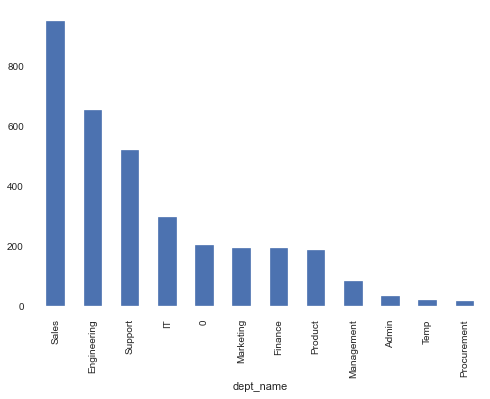

In [64]:
Emp_Left.groupby('dept_name')['employee_id'].count().sort_values(ascending=False)[:12].plot(kind='bar')

<font color='red'> - The above chart indicates, highest employee attrition belonged to Sales department followed by Engineering and Support deparments </font>

In [65]:
ExEmp_age_marital_status = Emp_Left.groupby('age')['marital_status'].value_counts().reset_index(name="Employee_count")

In [66]:
ExEmp_age_marital_status

,age,marital_status,Employee_count
0,0.0,Unmarried,3
1,22.0,Unmarried,366
2,23.0,Unmarried,382
3,24.0,Unmarried,373
4,25.0,Unmarried,372
5,26.0,Unmarried,104
6,26.0,Married,18
7,27.0,Unmarried,125
8,27.0,Married,15
9,28.0,Unmarried,112


In [67]:
Emp_employed['marital_status'].value_counts()

Married      5497
Unmarried    5266
Name: marital_status, dtype: int64

In [68]:
# Gender ratio of employees still employed 
Emp_employed['gender'].value_counts()

Male      7429
Female    3334
Name: gender, dtype: int64

In [69]:
data['recently_promoted'].value_counts()

0.0    13824
1.0      297
Name: recently_promoted, dtype: int64


<font color='red'>     
- The details indicate : unmarried, young, male employees leaving the organisation is higher than those that prefered to stay employed.
</font>

In [70]:
data['department'].value_counts()

D00-SS     4603
D00-ENG    2575
D00-SP     2109
D00-IT     1359
D00-PD      853
D00-MT      812
D00-FN      722
D00-MN      590
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64

In [71]:
# Target Variable : Status
data['status'].value_counts()

Employed    10763
Left         3358
Name: status, dtype: int64

In [72]:
data['filed_complaint'].value_counts()

0.0    12080
1.0     2041
Name: filed_complaint, dtype: int64

In [73]:
data.shape

(14121, 16)

In [74]:
print("Percentage of Current Employees is {:.1f}% and of Ex-employees is: {:.1f}%".format(
    data[data['status'] == 'Employed'].shape[0] / data.shape[0]*100,
    data[data['status'] == 'Left'].shape[0] / data.shape[0]*100))

Percentage of Current Employees is 76.2% and of Ex-employees is: 23.8%


### <font color='green'> Attrition Distribution :- </font>###

#### <u>Status:- <u> ####

In [75]:
num_features = []

for i in emp_details_data.columns:
  if ((data[i].dtype == int) | (data[i].dtype == float)):
    num_features.append(i)
    
print('Total Numerical Features:', len(num_features))
print(num_features)

Total Numerical Features: 7
['avg_monthly_hrs', 'filed_complaint', 'last_evaluation', 'recently_promoted', 'satisfaction', 'tenure', 'age']


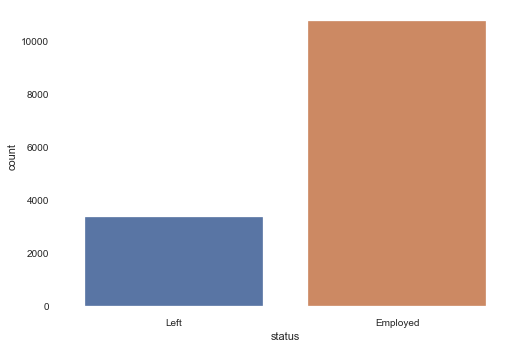

In [76]:
sns.countplot(data['status'])

#### <u>Gender Distribution :- <u>####

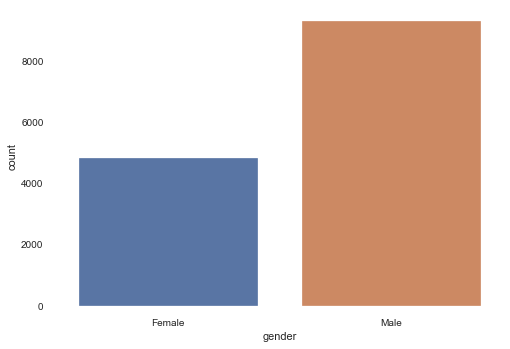

In [77]:
sns.countplot(data['gender'])

In [78]:
data['gender'].value_counts()

Male      9292
Female    4829
Name: gender, dtype: int64

#### <u>Recently Promoted :- <u>####

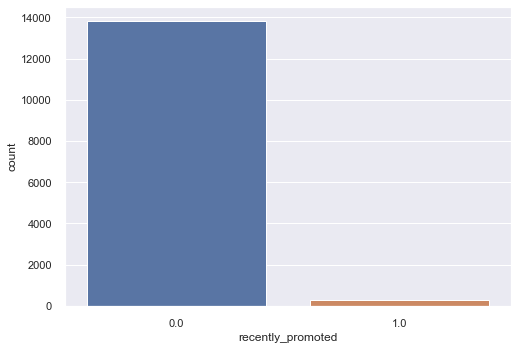

In [79]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="recently_promoted", data=data)

In [80]:
data['recently_promoted'].value_counts()

0.0    13824
1.0      297
Name: recently_promoted, dtype: int64

#### <u>Recently Promoted but still left organisation:- <u>####

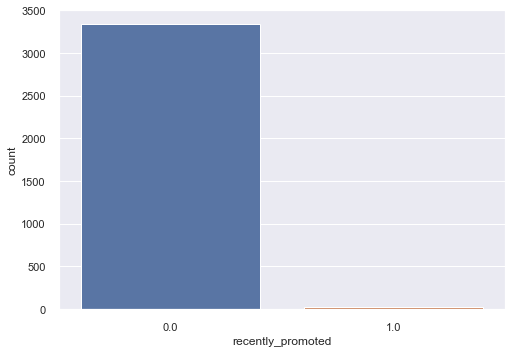

In [81]:
sns.countplot(x="recently_promoted", data=Emp_Left)

In [82]:
Emp_Left['recently_promoted'].value_counts()

0.0    3340
1.0      18
Name: recently_promoted, dtype: int64

### <font color='orange'> <u>Observations :- <u></font>###

- The above graph indicates that the number of employees promoted among those who left the organisation is so small that it is not visible in the graph
- **Delayed in Promotion"**  could be core reason for them to left considering their frustration towards waiting for promotion

#### <u>Project Distribution among employees :- <u>####

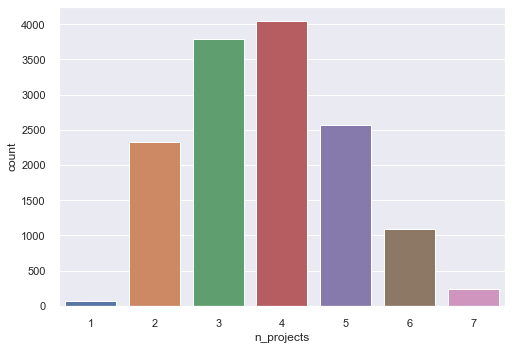

In [83]:
sns.countplot(x="n_projects", data=data)

-The chart above indicates average number of projects worked by employees as **"3.75 : Approximately 4"** 

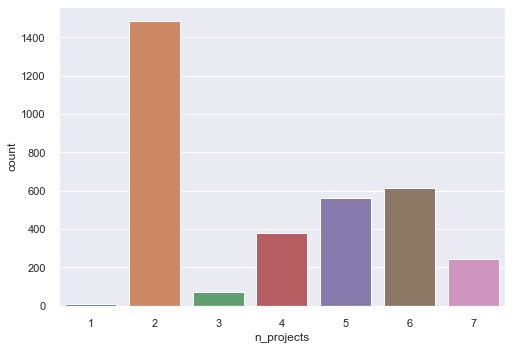

In [84]:
sns.countplot(x="n_projects", data=Emp_Left)

In [85]:
Emp_Left['n_projects'].value_counts()

2    1485
6     616
5     560
4     377
7     242
3      71
1       7
Name: n_projects, dtype: int64

### <font color='orange'> <u> Observations:- <u> ###

- On an average employee worked on **2 or more** projetcs are the one who left the organisation and main reason is not getting   **promotion**  
- Another focused area is the tenure i.e between **4-7 years of tenure** are leaving most 

#### <u>Filed Complaint :- <u>####

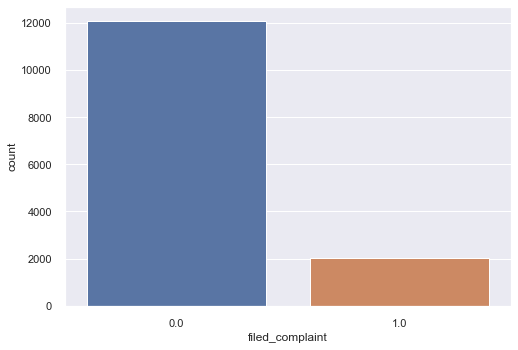

In [86]:
sns.countplot(x="filed_complaint", data=data)

In [87]:
data['filed_complaint'].value_counts()

0.0    12080
1.0     2041
Name: filed_complaint, dtype: int64

#### <u>Salary vs all Parameters :- <u>####

In [88]:
data.groupby('salary').mean()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id,age
salary,,,,,,,,,
high,199.342682,0.160386,0.708436,3.750219,0.059597,0.648767,3.644172,111364.503067,32.818580
low,200.240099,0.140868,0.719756,3.778181,0.009430,0.608925,3.403743,112328.502249,32.701436
medium,199.851158,0.145720,0.718519,3.783309,0.026943,0.632412,3.490554,111934.933629,33.103828


#### <u>Salary vs all Parameters for left employee:- <u>####

In [89]:
Emp_Left.groupby('salary').mean()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id,age
salary,,,,,,,,,
high,192.649351,0.000000,0.677137,3.402597,0.000000,0.447423,3.623377,116705.831169,30.363636
low,206.341176,0.043137,0.729745,3.827941,0.006863,0.448957,3.851961,115330.250000,31.760294
medium,208.175665,0.051571,0.732873,3.881547,0.003223,0.449551,3.849315,115485.850121,32.347301


### <font color='orange'> <u> Observations:- <u> ###


- Looking at above table - it indicates Employees who left are having below possible reasons :
    - worked for more hours, 
    - more projects, 
    - High tenure number of years 
- Have been paid less and not promoted, though their performance rating has been good
- Satisfaction level is much below average 
- Having less in comparison to those who are still employed as can been seen below

In [90]:
Emp_employed.groupby('salary').mean()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id,age
salary,,,,,,,,,
high,199.827068,0.171992,0.710701,3.775376,0.063910,0.663338,3.645677,110977.959586,32.996241
low,197.675458,0.181949,0.715557,3.757264,0.010509,0.676169,3.215331,111066.691943,33.097053
medium,197.719356,0.169831,0.714844,3.758151,0.033017,0.679240,3.398679,111025.588320,33.297565


<a id = Section6></a>
<font color='brown'> 
# **6. Data Visualisation**
</font>


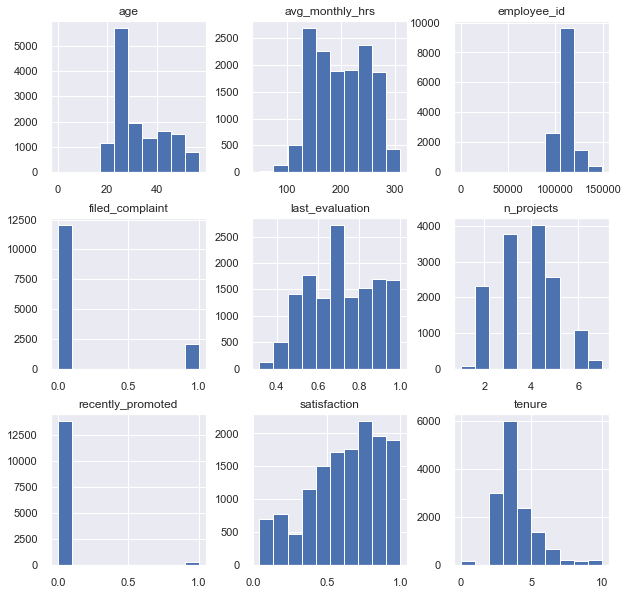

In [91]:
#Histogram of numeric variables of all employees both present and left
num_bins = 10

data.hist(bins=num_bins, figsize=(10,10))
plt.savefig("Employee_Info histogram_plots")
plt.show()


**<u>Salary Distribution Vs Employment Status:-<u>**

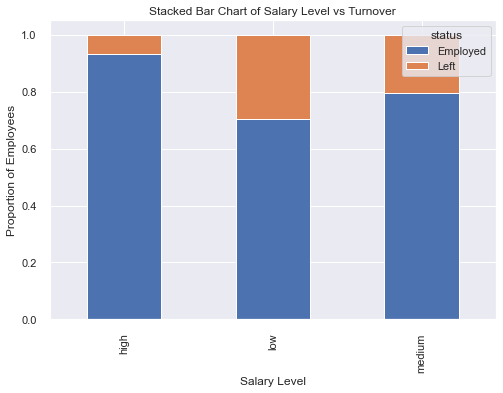

In [92]:
#Bar chart for employee salary level and the frequency of turnover
table=pd.crosstab(data.salary, data.status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')


<font color='red'> It is clear from the chart above that employees who left to have been paid less comparatively </font>

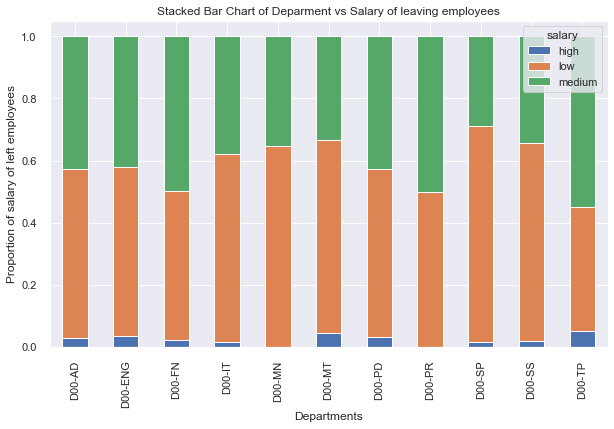

In [93]:

table=pd.crosstab(Emp_Left.department, Emp_Left.salary)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(10,6))
plt.title('Stacked Bar Chart of Deparment vs Salary of leaving employees')
plt.xlabel('Departments')
plt.ylabel('Proportion of salary of left employees')
plt.savefig('Departmentwise leaving employee Employee salary plot')


### <font color='orange'> <u> Observations:- <u> ###

- Above chart indicates that no high paid employees left from Management and Procurement departments.                           
- It is also evident that departments Sales, Support, Management and IT have more number of employees being paid low salaries among those who left

**<u> Department Vs Marital Status of Ex-Employees:- <u>**

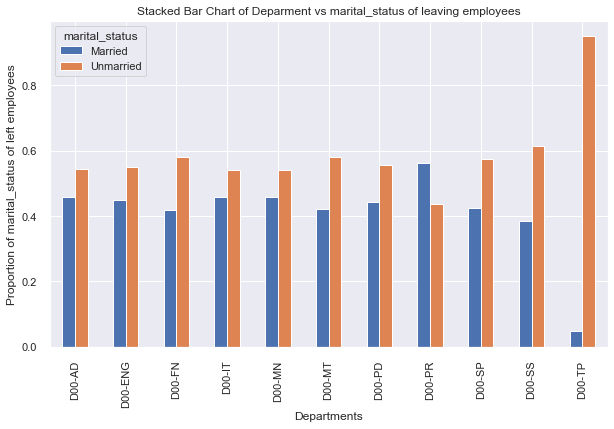

In [94]:

table=pd.crosstab(Emp_Left.department, Emp_Left.marital_status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',figsize=(10,6))
plt.title('Stacked Bar Chart of Deparment vs marital_status of leaving employees')
plt.xlabel('Departments')
plt.ylabel('Proportion of marital_status of left employees')
plt.savefig('Departmentwise leaving employee Employee marital_status plot')


### <font color='orange'> <u> Observations:- <u> ###


- Large number of employees leaving are found to be unmarried
- Highest number of employees leaving from Temporary department are unmarried employees                                      
- All departments from where ex-employees hail from have higher number of unmarried employees except Procurement department   
- Marital status plays an important role in employee leaving the company



### Summary:- ####

- **Salary:-** Highest attrition is with employees being paid low salary but very few highly paid employees are also leaving.                  There is attrition even with employees being paid medium and high salaries too.
- A small percentage of highly paid employeess are found to leave from Engineering, Maintenance and Sales departments.         
- Highest attrition is from Sales, followed by Engineering and Support departments   
- Employees leaving are comparatively younger, worked on 2 and more projects, for longer average hours with less salary, rated    good, but not promoted !
- Age, Marital status (being unmarried), Salary, Average work hours, recent promotion, number of projects worked on and level     of satisfaction are **important factors for employee attrition**

### Overall Employee Churn w.r.t departments:- ###

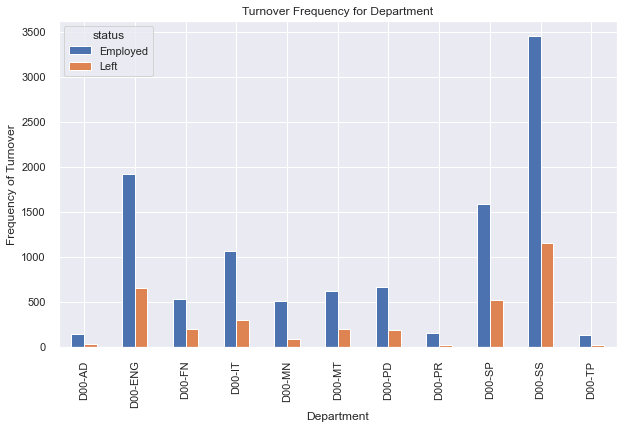

In [95]:
#Bar chart for department employee work for and the frequency of turnover
pd.crosstab(data.department,data.status).plot(kind='bar',figsize=(10,6))
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

### Observation:- ###

- It appears, from the chart above that the frequency of employee leaving depends on the department                             - Sales department has the highest attrition, followed by Engineering and Support                                               - Department can be a good predictor of the outcome variable.

### Department Vs Gender ratio of Ex-Employees:- ###

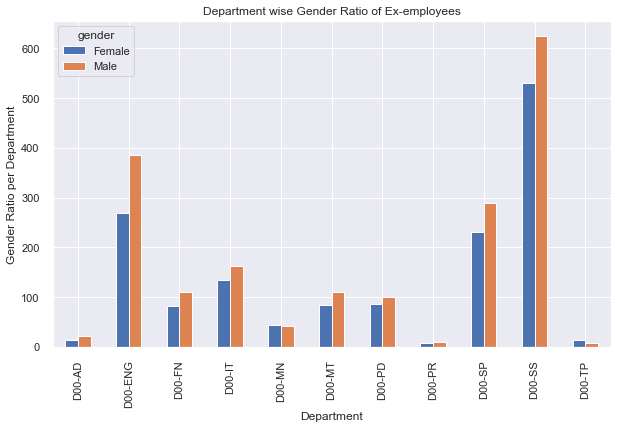

In [96]:
#Bar chart for department employee work for and the gender ratio
pd.crosstab(Emp_Left.department,Emp_Left.gender).plot(kind='bar',figsize=(10,6))
plt.title('Department wise Gender Ratio of Ex-employees')
plt.xlabel('Department')
plt.ylabel('Gender Ratio per Department')
plt.savefig('Department wise Gender Ratio of leaving employees')

<font color='red'> 
- The above chart indicates that more male employees left across almost all departments with highest being at Sales, followed by Engineering and Support </font>

### Employment Status Vs Recently Promoted

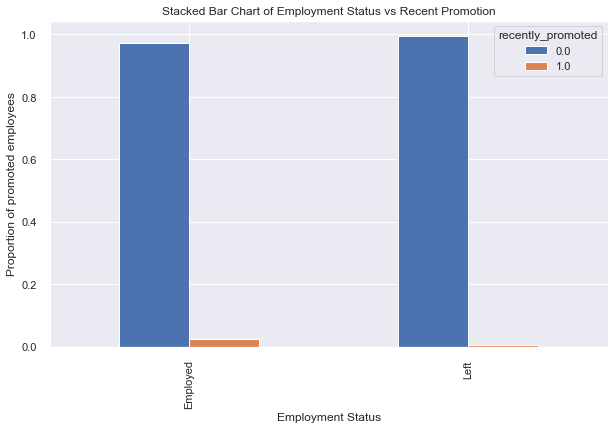

In [97]:
table=pd.crosstab(data.status, data.recently_promoted)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',figsize=(10,6))
plt.title('Stacked Bar Chart of Employment Status vs Recent Promotion')
plt.xlabel('Employment Status')
plt.ylabel('Proportion of promoted employees')
plt.savefig('Employee Employment Status Vs Employee promotion plot')


<font color='red'> 
#### Above chart indicates that not one employee was promoted in last 5 years among those who have left !

- There are more men than women in Ex-employees                                                                             
- Most departments have more men than women, as ex-employees, but without too much disparity,except for Sales and Engineering departments where the gender gap is slightly more
</font>

### Plot of Total number of employees that left and stayed by age

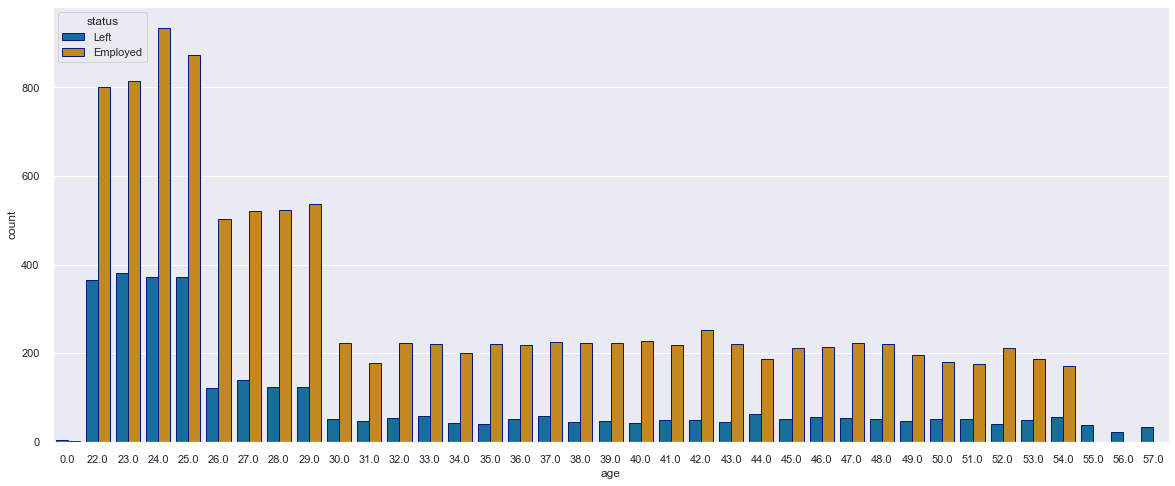

In [98]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns.countplot(x='age', hue='status', data = data, palette="colorblind", ax = ax,  edgecolor=sns.color_palette("dark", n_colors = 1));

<font color='red'> 
- The chart aove indicates that density of emlpoyees leving in the age group of 22 to 29 years to be high </font>

### Tenure Vs Employee Employment Status

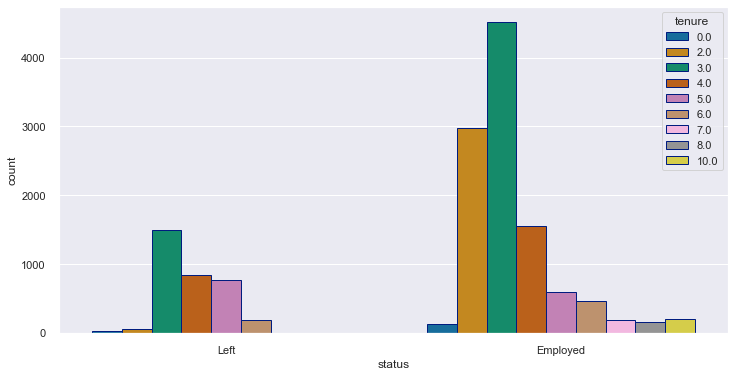

In [99]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns.countplot(x='status', hue='tenure', data = data, palette="colorblind", ax = ax,  edgecolor=sns.color_palette("dark", n_colors = 1));

### Plot of Ex- employee Marital status Vs Age

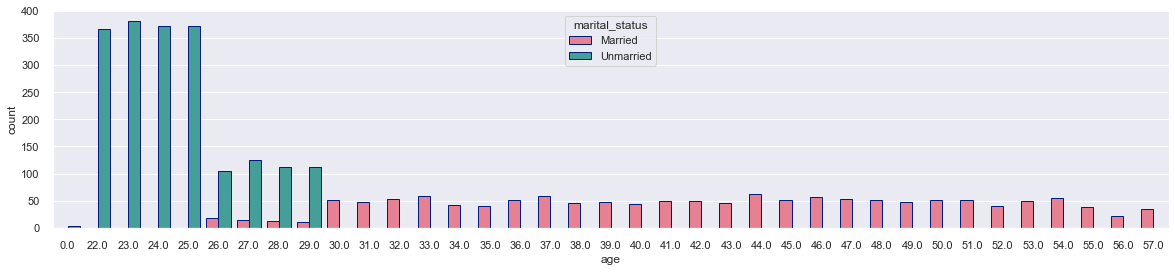

In [100]:
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns.countplot(x='age', hue='marital_status', data = Emp_Left, palette="husl", ax = ax,  edgecolor=sns.color_palette("dark", n_colors = 1));

<font color='red'> 
- Between the age 22-29 whi left are highly skewed towards marital status as unmarried 
- For rest who left are majority married employeess 
</font>

**<u> Plot of marital status Vs Employee Employment Status:- <u>**

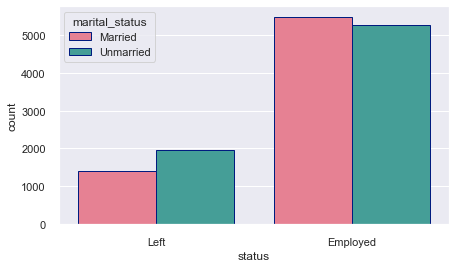

In [101]:
fig_dims = (7, 4)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns.countplot(x='status', hue='marital_status', data = data, palette="husl", ax = ax,  edgecolor=sns.color_palette("dark", n_colors = 1));

<font color='red'> 
- Above chart indicates more male employees to have left than female employees
</font>

**<u> Distribution of Ex-Employee Age w.r.t Departments:- <u>**

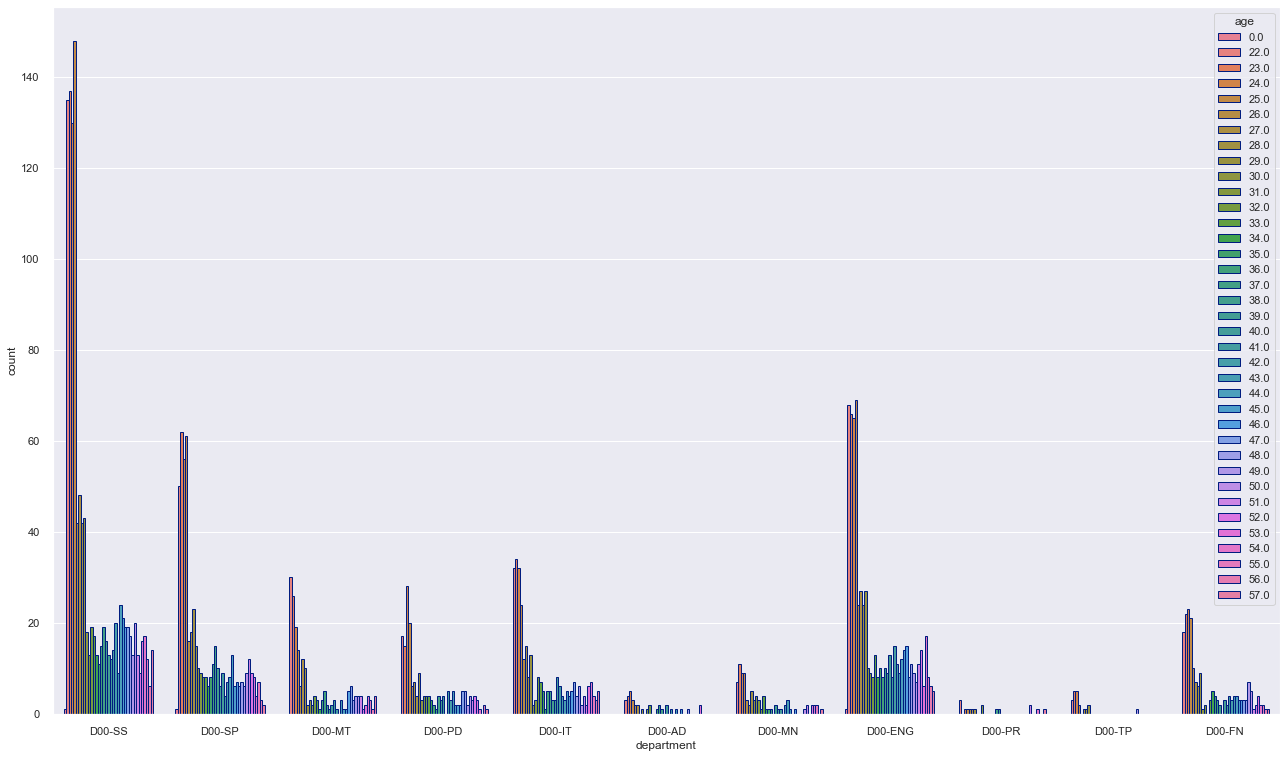

In [102]:
fig_dims = (22, 13)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns_plot=sns.countplot(x='department', hue='age',data = Emp_Left,palette="husl",ax = ax,edgecolor=sns.color_palette("dark", n_colors = 1));
fig = sns_plot.get_figure()
fig.savefig('dept-age.png')


<font color='red'> 
- The above chart indicatesthat the highest number of employees that left were from Sales department followed by Engineering and Support and were in the age group of 22-35 years
</font>

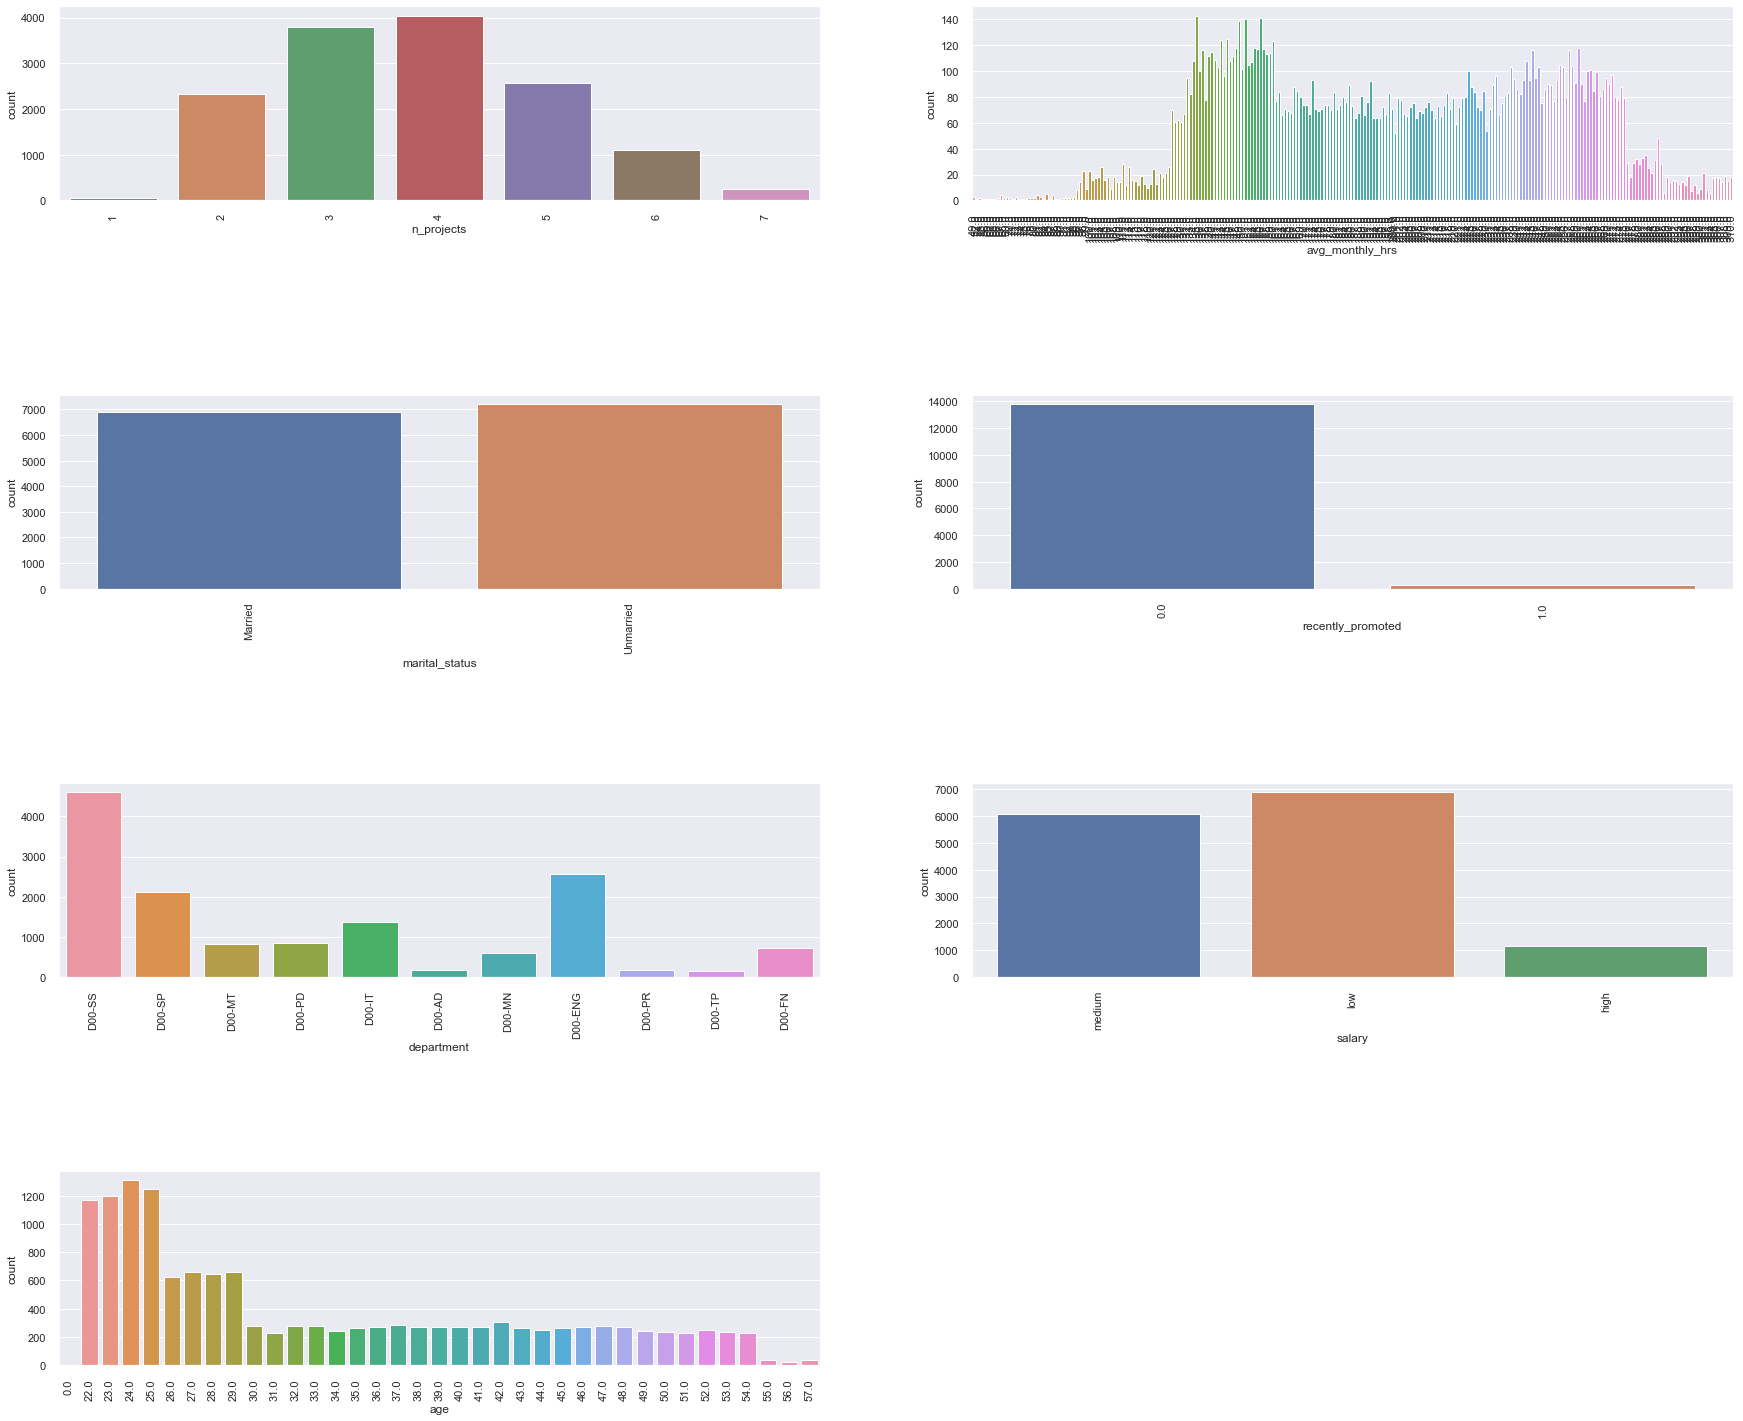

In [103]:
features=['n_projects','avg_monthly_hrs','marital_status','recently_promoted','department','salary','age']
fig=plt.subplots(figsize=(30,25))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data)
    plt.xticks(rotation=90)

<font color='orange'> 
**<u> Observations from above charts:- <u>**
</font>

- **Attrition** is the highest in Sales department
- Age of employees leaving the company is **lower than** those still employed.
- Number of **unmarried** employees leaving are **higher**
- Low salaried employees are found leaving more in comparison to medium and high salaried are leaving the lowest!
- Employees who have **not been promoted** from long are leaving
- Employees having **more number** of projects are found to leave
- Average working hours per month is found **higher** in employees who have left.

**<u> Average monthly hours of work Vs Departments:- <u>**

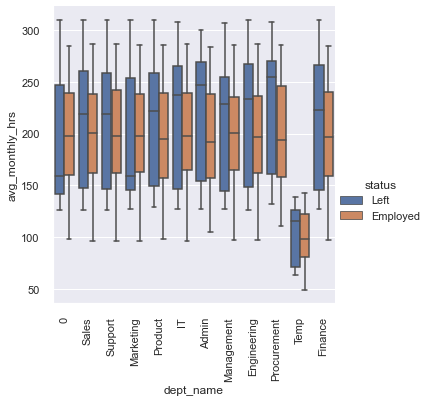

In [104]:
sns.catplot(x="dept_name", y="avg_monthly_hrs", hue="status", kind="box", data=data).set_xticklabels(rotation=90)

**<u> Impact of Satisfaction and Last Evaluation w.r.t Ex-Employees:- <u>**


In [105]:
#import module
from sklearn.cluster import KMeans
# Filter data
left_emp =  data[['satisfaction', 'last_evaluation']][data.status == "Left"]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 1).fit(left_emp)

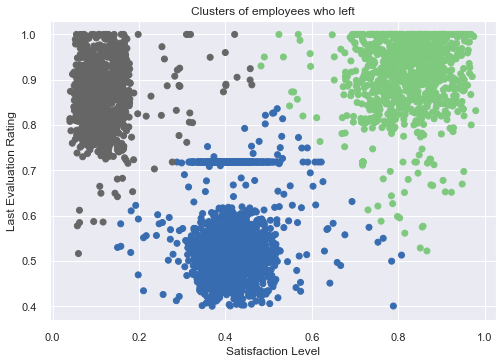

In [106]:
# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_
# Create scatter plot
plt.scatter(left_emp['satisfaction'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation Rating')
plt.title('Clusters of employees who left')
plt.show()

<font color='orange'> 
**<u> Observations from above chart:- <u>**
<font>



- From the above clusters we can find that Employee who left the company can be grouped into 3 types of employees:
    - High Evaluation rating, but low satisfaction
    - High rating and high satisfaction
    - Medium to low rating and medium and low satisfaction 

**<u> Scatter plot of satisfaction and avg working hours of Ex-Employees:0 <u>**

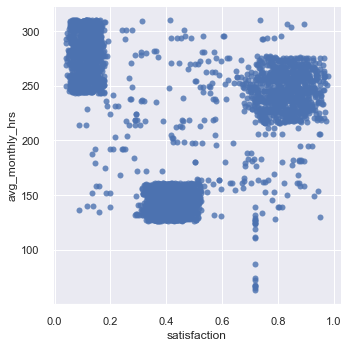

In [107]:
sns.lmplot(x='satisfaction', y='avg_monthly_hrs', data=Emp_Left,fit_reg=False)

<font color='green'> 
## Statistical Test ##
</font>

**<u> Hypothesis Testing :- Chi Square Test <u>**
    
    
In the case of **classification problems** where input variables are also **categorical**, we can use **statistical tests** to determine whether the output variable is **dependent or independent** of the input variables. 

If **independent**, then the input variable is a candidate for a feature that may be irrelevant to the problem and removed from the dataset.

The **Pearson’s chi-square** statistical hypothesis is used to test for **independence** between **categorical** variables.


<center><img src="https://github.com/jmps967/INSAID-CapstoneProject-2-ML/blob/master/Image/ChiSquareWordle.png?raw=true" width="1020" height="5200" /></center>

In [108]:
# Reading Chi Square Result:

ChiSq = pd.read_excel("Result-chisq.xlsx")

In [109]:
print("Performed Chi-Square test on categorical variables")
print("Hypothesis : - H0: Status vs other variables are not related")
ChiSq

Performed Chi-Square test on categorical variables
Hypothesis : - H0: Status vs other variables are not related


,Parameters,Gender,Married?,tenure,recently promoted,no of project,compl_filled
0,dof,1,1,7,1,6,1
1,stat (Calc Value),206.055,83.5268,1977.52,51.5928,4969.73,352.014
2,critical (Table Value),3.84146,3.84146,14.0671,3.84146,12.5916,3.84146
3,stat vs critical,Reject Ho,Reject Ho,Reject Ho,Reject Ho,Reject Ho,Reject Ho
4,interpret p value,Reject Ho,Reject Ho,Reject Ho,Reject Ho,Reject Ho,Reject Ho


**<u> Correlation:- <u>**

In [110]:
# Find correlations with the target( Employee Leaving=1) and sort
df_Attr = data.copy()
df_Attr['Target-Left'] = data['status'].apply(lambda x: 0 if x == 'Employed' else 1)
df_Attr = df_Attr.drop(['employee_id'], axis=1)
correlations = df_Attr.corr()['Target-Left'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 n_projects         0.026754
last_evaluation    0.038851
avg_monthly_hrs    0.073682
tenure             0.143806
Target-Left        1.000000
Name: Target-Left, dtype: float64

Most Negative Correlations: 
 satisfaction        -0.387807
filed_complaint     -0.157692
recently_promoted   -0.061006
age                 -0.052499
n_projects           0.026754
Name: Target-Left, dtype: float64


**<u> Plot heatmap to visualise relation of parameters in the dataset w.r.t attrition:- <u>**

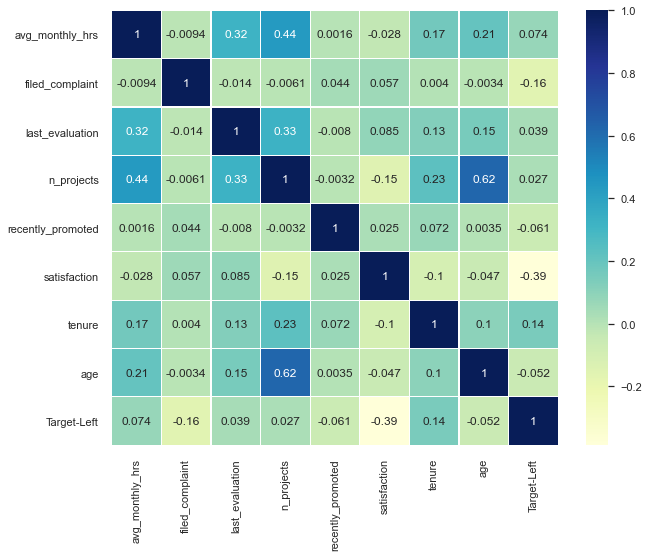

In [111]:
# Calculate correlations
corr = df_Attr.corr()
#mask = np.zeros_like(corr)
#mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(10, 8))
#sns.heatmap(corr,vmax=.5,mask=mask,linewidths=.2, cmap="YlGnBu")
sns.heatmap(corr,linewidths=.2, annot=True, cmap="YlGnBu")

In [112]:
#Print all of the object data types and their unique values
for column in df_Attr.columns:
    if df_Attr[column].dtype == object:
        print(str(column) + ' : ' + str(df_Attr[column].unique()))
        print(df_Attr[column].value_counts())
        print("_________________________________________________________________")

department : ['D00-SS' 'D00-SP' 'D00-MT' 'D00-PD' 'D00-IT' 'D00-AD' 'D00-MN' 'D00-ENG'
 'D00-PR' 'D00-TP' 'D00-FN']
D00-SS     4603
D00-ENG    2575
D00-SP     2109
D00-IT     1359
D00-PD      853
D00-MT      812
D00-FN      722
D00-MN      590
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64
_________________________________________________________________
salary : ['medium' 'low' 'high']
low       6893
medium    6087
high      1141
Name: salary, dtype: int64
_________________________________________________________________
status : ['Left' 'Employed']
Employed    10763
Left         3358
Name: status, dtype: int64
_________________________________________________________________
gender : ['Female' 'Male']
Male      9292
Female    4829
Name: gender, dtype: int64
_________________________________________________________________
marital_status : ['Married' 'Unmarried']
Unmarried    7216
Married      6905
Name: marital_status, dtype: int64
____________________

<a id = Section7></a>

<font color='brown'> 
# **7. Data Post-Processing**
</font>


In [113]:
df_Attr = data.copy()

In [114]:
df_Attr = data.drop(['dept_head','dept_name'], axis = 1).copy()

In [115]:
df_Attr.head(3)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status
0,246.0,D00-SS,0.0,0.866838,6,0.0,medium,0.134415,Left,4.0,124467,42.0,Female,Married
1,134.0,D00-SS,0.0,0.555718,2,0.0,low,0.511041,Left,3.0,112210,23.0,Female,Unmarried
2,156.0,D00-SS,1.0,0.474082,2,0.0,medium,0.405101,Left,3.0,126150,24.0,Female,Unmarried


<a id = Section71></a>

<font color='green'> 
## Pre-processing Pipeline
</font>

<font color='Grey'> 
### Prepare Test Data
</font>

In [116]:
# Fetch test data and process:
# read unseen data:
unseen_data = pd.read_excel("GCD_Capstone_Project_unseen_data.xlsx")

In [117]:
unseen_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id
0,134,D00-IT,NaN,0.528841,2,NaN,low,0.400464,3.0,119045
1,221,D00-PD,NaN,0.784561,2,NaN,low,0.759513,3.0,112223
2,156,D00-SS,NaN,0.545183,2,NaN,medium,0.336457,3.0,103924
3,133,D00-PR,NaN,NaN,4,NaN,medium,0.832039,2.0,105922
4,135,D00-SS,NaN,0.454637,2,NaN,low,0.320723,5.0,103297


In [118]:
unseen_data.isnull().sum().sort_values(ascending = False)

recently_promoted    97
filed_complaint      85
last_evaluation      17
tenure                3
satisfaction          3
department            2
employee_id           0
salary                0
n_projects            0
avg_monthly_hrs       0
dtype: int64

In [119]:
unseen_data.department.unique()

array(['D00-IT', 'D00-PD', 'D00-SS', 'D00-PR', 'D00-FN', 'D00-MT',
       'D00-MN', 'D00-ENG', 'D00-SP', 'D00-TP', nan, '-IT', 'D00-AD'],
      dtype=object)

**<u> Make corrections and Fill Missing Values in Test Data:- <u>**

In [120]:
unseen_data.replace({'-IT'},{'D00-IT'},inplace =True)
unseen_data['last_evaluation'] = unseen_data['last_evaluation'].fillna((unseen_data['last_evaluation'].mean()))
unseen_data['satisfaction'] = unseen_data['satisfaction'].fillna((unseen_data['last_evaluation'].mean()))
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer(missing_values=np.nan, strategy='most_frequent')
# For department
imputer = imputer.fit(unseen_data["department"])
unseen_data["department"] = imputer.transform(unseen_data["department"]) 
# Any remaining, fill with zeros
unseen_data = unseen_data.replace(np.nan, 0)

In [121]:
unseen_data = unseen_data.drop_duplicates()

In [122]:
# Join unseen_data and emp_details using employee_id as common column:
cols = ['employee_id']
unseen_data_details = unseen_data.join(emp_details.set_index(cols), on=cols)

In [123]:
unseen_data_details.head(3)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id,age,gender,marital_status
0,134,D00-IT,0.0,0.528841,2,0.0,low,0.400464,3.0,119045,27,Male,Unmarried
1,221,D00-PD,0.0,0.784561,2,0.0,low,0.759513,3.0,112223,23,Male,Unmarried
2,156,D00-SS,0.0,0.545183,2,0.0,medium,0.336457,3.0,103924,26,Male,Unmarried


In [124]:
emp_data.head(3)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.0,NaN,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467
1,134.0,NaN,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150


In [125]:
temp = emp_data.drop(['avg_monthly_hrs','department','filed_complaint','last_evaluation','n_projects','recently_promoted','salary','satisfaction','tenure'],axis = 1)

In [126]:
cols = ['employee_id']
unseen_data_details = unseen_data_details.join(temp.set_index(cols), on=cols)

In [127]:
unseen_data_details.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id,age,gender,marital_status,status
0,134,D00-IT,0.0,0.528841,2,0.0,low,0.400464,3.0,119045,27,Male,Unmarried,NaN
1,221,D00-PD,0.0,0.784561,2,0.0,low,0.759513,3.0,112223,23,Male,Unmarried,NaN
2,156,D00-SS,0.0,0.545183,2,0.0,medium,0.336457,3.0,103924,26,Male,Unmarried,NaN
3,133,D00-PR,0.0,0.744114,4,0.0,medium,0.832039,2.0,105922,52,Male,Married,NaN
4,135,D00-SS,0.0,0.454637,2,0.0,low,0.320723,5.0,103297,27,Male,Unmarried,NaN


<font color='orange'> 
**<u> Encode Categorical to Numerical Test Data:- <u>**
</font>

In [128]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
Label_Encoder = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in unseen_data_details.columns[1:]:
    if unseen_data_details[col].dtype == 'object':
        if len(list(unseen_data_details[col].unique())) <= 12:
            Label_Encoder.fit(unseen_data_details[col])
            unseen_data_details[col] = Label_Encoder.transform(unseen_data_details[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))
# Any remaining, fill with zeros
unseen_data_details = unseen_data_details.replace(np.nan, 0)

5 columns were label encoded.


In [129]:
unseen_data_details.head(3)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id,age,gender,marital_status,status
0,134,3,0.0,0.528841,2,0.0,1,0.400464,3.0,119045,27,1,1,0
1,221,6,0.0,0.784561,2,0.0,1,0.759513,3.0,112223,23,1,1,0
2,156,9,0.0,0.545183,2,0.0,2,0.336457,3.0,103924,26,1,1,0


<font color='orange'> 
**<u> Feature Scaling Test Data:- <u>**
</font>

In [130]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

df_test = unseen_data_details.copy()
scaler = MinMaxScaler(feature_range=(0, 1))
test_col = list(df_test.columns)
test_col.remove('status')
for col in test_col:
    df_test[col] = df_test[col].astype(float)
    df_test[[col]] = scaler.fit_transform(df_test[[col]])
df_test['status'] = pd.to_numeric(df_test['status'], downcast='float')
df_test.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id,age,gender,marital_status,status
0,0.298643,0.3,0.0,0.218900,0.166667,0.0,0.5,0.367901,0.3,0.419276,0.147059,1.0,1.0,0.0
1,0.692308,0.6,0.0,0.642839,0.166667,0.0,0.5,0.746452,0.3,0.267253,0.029412,1.0,1.0,0.0
2,0.398190,0.9,0.0,0.245992,0.166667,0.0,1.0,0.300418,0.3,0.082318,0.117647,1.0,1.0,0.0
3,0.294118,0.7,0.0,0.575786,0.500000,0.0,1.0,0.822916,0.2,0.126841,0.882353,1.0,0.0,0.0
4,0.303167,0.9,0.0,0.095883,0.166667,0.0,0.5,0.283830,0.5,0.068345,0.147059,1.0,1.0,0.0


In [131]:
df_test = df_test.drop(['status'], axis =1)

In [132]:
df_test.isnull().sum().sort_values(ascending = False)

marital_status       0
gender               0
age                  0
employee_id          0
tenure               0
satisfaction         0
salary               0
recently_promoted    0
n_projects           0
last_evaluation      0
filed_complaint      0
department           0
avg_monthly_hrs      0
dtype: int64

<font color='Grey'> 
### Prepare Training Data
</font>

**<u> Encode categorical into numerical:- <u>**

In [133]:
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in df_Attr.columns[1:]:
    if df_Attr[col].dtype == 'object':
        if len(list(df_Attr[col].unique())) <= 12:
            Label_Encoder.fit(df_Attr[col])
            df_Attr[col] = Label_Encoder.transform(df_Attr[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

5 columns were label encoded.


In [134]:
df_Attr.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status
0,246.0,9,0.0,0.866838,6,0.0,2,0.134415,1,4.0,124467,42.0,0,0
1,134.0,9,0.0,0.555718,2,0.0,1,0.511041,1,3.0,112210,23.0,0,1
2,156.0,9,1.0,0.474082,2,0.0,2,0.405101,1,3.0,126150,24.0,0,1
3,256.0,8,0.0,0.961360,6,0.0,1,0.152974,1,4.0,125346,51.0,0,0
4,146.0,9,0.0,0.507349,2,0.0,2,0.434845,1,3.0,113707,23.0,0,1


In [135]:
df_Attr.columns.values

array(['avg_monthly_hrs', 'department', 'filed_complaint',
       'last_evaluation', 'n_projects', 'recently_promoted', 'salary',
       'satisfaction', 'status', 'tenure', 'employee_id', 'age', 'gender',
       'marital_status'], dtype=object)

In [136]:
df_Attr_vars=df_Attr.columns.values.tolist()
y=['status']
X=[i for i in df_Attr_vars if i not in y]

In [137]:
X

['avg_monthly_hrs',
 'department',
 'filed_complaint',
 'last_evaluation',
 'n_projects',
 'recently_promoted',
 'salary',
 'satisfaction',
 'tenure',
 'employee_id',
 'age',
 'gender',
 'marital_status']

<font color='orange'> 
**<u> Feature Scaling:- <u>**
    </font>

- Feature Scaling using MinMaxScaler essentially shrinks the range such that the range is now between 0 and n
- **Machine Learning algorithms** perform **better** when input **numerical** variables fall within a **similar scale**.      
- In this case, scaling is between 0 and 1.

In [138]:
scaler = MinMaxScaler(feature_range=(0, 1))
Attr_col = list(df_Attr.columns)
Attr_col.remove('status')
for col in Attr_col:
    df_Attr[col] = df_Attr[col].astype(float)
    df_Attr[[col]] = scaler.fit_transform(df_Attr[[col]])
df_Attr['status'] = pd.to_numeric(df_Attr['status'], downcast='float')
df_Attr.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status
0,0.754789,0.9,0.0,0.805269,0.833333,0.0,1.0,0.098294,1.0,0.4,0.835416,0.736842,0.0,0.0
1,0.325670,0.9,0.0,0.350299,0.166667,0.0,0.5,0.490637,1.0,0.3,0.753148,0.403509,0.0,1.0
2,0.409962,0.9,1.0,0.230917,0.166667,0.0,1.0,0.380276,1.0,0.3,0.846712,0.421053,0.0,1.0
3,0.793103,0.8,0.0,0.943494,0.833333,0.0,0.5,0.117628,1.0,0.4,0.841316,0.894737,0.0,0.0
4,0.371648,0.9,0.0,0.279566,0.166667,0.0,1.0,0.411261,1.0,0.3,0.763196,0.403509,0.0,1.0


### **Post Profiling Report**

**1. emp_data.csv:-**

In [139]:
profile4 = ProfileReport(df = emp_data)

In [140]:
profile4.to_file(output_file = "Post Profiling Report_empdata.html")
print('Post-Profiling Accomplished!')


Post-Profiling Accomplished!


**2. emp_data.csv:-**

In [141]:
profile5 = ProfileReport(df = emp_details)

In [142]:
profile5.to_file(output_file = "Post Profiling Report_empdetails.html")
print('Post-Profiling Accomplished!')


Post-Profiling Accomplished!


**3. dept_data.csv:-**

In [143]:
profile6 = ProfileReport(df = dept_data)

In [144]:
profile6.to_file(output_file = "Post Profiling Report_deptdata.html")
print('Post-Profiling Accomplished!')


Post-Profiling Accomplished!


<font color='Orange'> 
**<u> Feature Selection:- <u>**
    </font>

- The **Recursive Feature Elimination (RFE)** works by recursively removing variables and building a model on those variables that remain. 
- It uses the **model accuracy*** to identify which variables (and combination of variables) **contribute the most to predicting** the target attribute.
- Using **feature selection** to help us decide which variables are **significant** that can **predict employee turnover** with **good amount of accuracy**. 
- There are total **13** columns in X, out of which selecting **10** initially.

<font color='Orange'> 
# **Data is ready for model building**
</font>

<a id = Section8></a>

<font color='brown'> 
# **8. Model Development & Evaluation**
</font>


<a id = Section81></a>

<font color='green'> 
## 8.1 Feature Selection ##
</font>

<a id = Section811></a>

<font color='Green'> 
### <u> 8.1.1 Logistic Regression <u> ###
</font>

In [145]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#Recursive Feature Elimination (RFE)
model = LogisticRegression()

rfe = RFE(model,10)
rfe = rfe.fit(df_Attr[X], np.ravel(df_Attr[y]))
print(rfe.support_)
print(rfe.ranking_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning:

Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error



[ True False  True  True  True  True False  True  True  True  True False
  True]
[1 3 1 1 1 1 4 1 1 1 1 2 1]


<a id = Section812></a>

<font color='Green'> 
### <u> 8.1.2 Random Forest Regressor <u> ###
</font>

In [146]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1, n_estimators=10, verbose=3)
rfe = RFE(model,10)
rfe = rfe.fit(df_Attr[X], np.ravel(df_Attr[y]))
print(rfe.support_)
print(rfe.ranking_)

building tree 1 of 10building tree 2 of 10building tree 3 of 10
building tree 4 of 10

building tree 5 of 10

building tree 6 of 10building tree 7 of 10
building tree 8 of 10

building tree 9 of 10

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning:

Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.1s remaining:    0.0s



building tree 10 of 10
building tree 1 of 10building tree 2 of 10building tree 3 of 10
building tree 4 of 10

building tree 5 of 10
building tree 6 of 10

building tree 7 of 10
building tree 8 of 10
building tree 9 of 10

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.



building tree 10 of 10
building tree 1 of 10building tree 2 of 10
building tree 3 of 10

building tree 4 of 10building tree 5 of 10
building tree 6 of 10

building tree 7 of 10
building tree 8 of 10


[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 9 of 10
building tree 10 of 10
building tree 1 of 10building tree 2 of 10
building tree 3 of 10

building tree 4 of 10
building tree 5 of 10building tree 6 of 10

building tree 7 of 10
building tree 8 of 10


[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 9 of 10
building tree 10 of 10
[ True  True False  True  True False  True  True  True  True  True  True
 False]
[1 1 2 1 1 4 1 1 1 1 1 1 3]


[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished


In [147]:
df_Attr.head(1)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status
0,0.754789,0.9,0.0,0.805269,0.833333,0.0,1.0,0.098294,1.0,0.4,0.835416,0.736842,0.0,0.0


**<u> Considering all  features and not just those shortlisted by Logistic Rgression or  RF Classifier:- <u>**

In [148]:
y=df_Attr['status']

In [149]:
cols = ['avg_monthly_hrs','department','filed_complaint','last_evaluation','n_projects','recently_promoted','salary','satisfaction','tenure','employee_id','age','gender','marital_status']
X=df_Attr[cols]
df_Attr = df_Attr.drop(['status'],axis=1)

<a id = Section82></a>

<font color='green'> 
## 8.2 Handling Imbalance Data ##
</font>

<font color='red'> 
- There is class imbalance (i.e. more employees with turnover=0 than turnover=1)    
</font>

<a id = Section821></a>

<font color='Maroon'> 
### <u> 8.2.1 Approach1:- ###  
</font>

### using stratify=y to maintain the same ratio as in the training dataset when splitting the dataset ### 

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=y)
print("Number of samples in X_train dataset: ", X_train.shape)
print("Number of samples in y_train dataset: ", y_train.shape)
print("Number of samples in X_test dataset: ", X_test.shape)
print("Number of samples in y_test dataset: ", y_test.shape)


Number of samples in X_train dataset:  (10590, 13)
Number of samples in y_train dataset:  (10590,)
Number of samples in X_test dataset:  (3531, 13)
Number of samples in y_test dataset:  (3531,)


<font color='Maroon'> 
## Building Machine Learning Models ##
</font>

<font color='Green'> 
### <u> Logistic Regression <u> ###
</font>

### Introduction to Logistic Regression ###

Logistic regression is a techinque used for solving the __classification problem__.<br/> And Classification is nothing but a problem of __identifing__ to which of a set of __categories__ a new observation belongs, on the basis of _training dataset_ containing observations (or instances) whose categorical membership is known. <br/>For example to predict:<br/> __Whether an email is spam (1) or not (0)__ or,<br/> __Whether the tumor is malignant (1) or not (0)<br/>__
Below is the pictorial representation of a basic logistic regression model to classify set of images into _happy or sad._



<center><img src="https://github.com/jmps967/INSAID-CapstoneProject-2-ML/blob/master/Image/logistic%20reg.png?raw=true" width="1020" height="520" /></center>


- Logistic regression are **supervised learning** techinques and the classification problem where the output is discrete. 
- Logistic Regression is used when the dependent variable(target) is **categorical**.
- **Sigmoid function or logistic function** is used as hypothesis function for logistic regression. 
- Below is a figure showing the logistic regression, Also notice that logistic regression produces a **logistic curve**, which is limited to values **between 0 and 1**. 


<center><img src="https://github.com/jmps967/INSAID-CapstoneProject-2-ML/blob/master/Image/logistic%20reg_curve.png?raw=true" width="1020" height="520" /></center>

In [151]:
#Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.809


<font color='Green'> 
### <u> Random Forest Regressor <u> ###
</font>

### Introduction to Random Forest ###


<center><img src="https://github.com/jmps967/INSAID-CapstoneProject-2-ML/blob/master/Image/random_forest1.png?raw=true" width="1020" height="520" /></center>


__Random Forest__ is considered to be the __panacea__ of all data science problems. On a funny note, when you can’t think of any algorithm (irrespective of situation), use random forest!

In Random Forest, we grow __multiple trees__ as opposed to a single tree in CART model . To classify a new object based on attributes, each tree gives a classification and we say the tree “votes” for that class. __The forest chooses the classification having the most votes__ (over all the trees in the forest) and in case of __regression__, it takes the __average of outputs by different trees.__

Random Forest is a versatile machine learning method capable of performing __both regression and classification tasks__. It also undertakes dimensional reduction methods, treats missing values, outlier values and other essential steps of data exploration, and does a fairly good job. It is a type of __ensemble learning__ method, where __a group of weak models combine to form a powerful model.__

### Concept behind random forest ###

The random forest is a model made up of many decision trees. Rather than just being a forest though, this model is random because of two concepts:

1. Random sampling of data points
2. Splitting nodes based on subsets of features


###  __Random Sampling__###

- One of the keys behind the random forest is that __each tree trains on random samples__ of the data points. 
- The samples are drawn with _replacement_ (known as __bootstrapping__) which means that some samples will be trained on in a single tree multiple times (we can also disable this behavior if we want).
- The idea is that by training each tree on different samples, although __each tree__ might have __high variance__ with respect to a particular set of the training data, overall, the __entire forest __will have __low variance__.
- This procedure of training each individual learner on different subsets of the data and then averaging the predictions is known as __bagging__, short for bootstrap aggregating.

<center><img src="https://github.com/jmps967/INSAID-CapstoneProject-2-ML/blob/master/Image/random_forest_sampling.png?raw=true" width="1020" height="520" /></center>

To more clearly understand bagging summarised below are the steps to follow: 

1. __Create Multiple DataSets__:
    - Sampling is done with replacement on the original data and new datasets are formed.
    - The new data sets can have a fraction of the columns as well as rows, which are generally hyper-parameters in a bagging model
    - Taking row and column fractions less than 1 helps in making robust models, less prone to overfitting
2. __Build Multiple Classifiers__:
    - Classifiers are built on each data set.
    - Generally the same classifier is modeled on each data set and predictions are made.
3. __Combine Classifiers__:
    - The predictions of all the classifiers are combined using either mean or mode value depending on the problem at hand.
    - Generally __mean__ are used for __regression__ problems and __mode__ is used for __classification__ problems.  
    - The combined values are generally more robust than a single model.
    

###  __Random Subsets of Features__ ###

- Another concept behind the random forest is that only a __subset__ of all the __features__ are considered for splitting each node in each decision tree. Generally this is set to __sqrt(n_features)__ meaning that at each node, the decision tree considers splitting on a sample of the features totaling the square root of the total number of features. 
- The random forest _can_ also be trained considering __all the features__ at every node. (These options can be controlled in the Scikit-Learn random forest implementation).


The random forest combines hundreds or __thousands of decision trees__, trains each one on a __slightly different set of the observations__ (sampling the data points with replacement) and also __splits nodes in each tree considering only a limited number of the features.__ The final predictions made by the random forest are made by __averaging the predictions of each individual tree.__

In [152]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.981


<font color='Green'> 
### <u> Support Vector Machines (SVM) <u> ###
</font>

### Introduction to SVM ###

Support vector machines so called as **SVM** is a **supervised learning algorithm** which can be used for **classification and regression** problems as support vector classification (SVC) and support vector regression (SVR). 
It is used for smaller dataset as it takes too long to process. 

<center><img src="https://github.com/jmps967/INSAID-CapstoneProject-2-ML/blob/master/Image/svm_pic.png?raw=true" width="1020" height="520" /></center>


SVM is based on the idea of finding a __hyperplane__ that best separates the features into different domains.
> __What is Hyperplane?__<br>
We can draw a line in 1-D, a plane in 2-D, anything beyond is a hyperplane.


The points closest to the hyperplane are called as the __support vector points__ and the distance of the vectors from the hyperplane are called the __margins__.
- 'Support vector points'
- 'Margins'

<center><img src="https://github.com/jmps967/INSAID-CapstoneProject-2-ML/blob/master/Image/svm_3.png?raw=true" width="1020" height="520" /></center>


1. The basic intuition to develop over here is that  __farther the SV points__, from the hyperplane, __better__ the __probability of correctly classifying__ the points in their respective class regions. 
2. SV points are very __critical__ in determining the __hyperplane__ because if the position of the vectors changes the hyperplane’s position is altered. 
3. Technically this hyperplane can also be called as __margin maximizing hyperplane__.


In [153]:
#SVM Classifier
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))

Support vector machine accuracy: 0.947


<font color='Green'> 
### <u> Decision Tree Classifier <u> ###
</font>


### Introduction of Decision Tree ###


A __decision tree__ is one of most frequently and widely used supervised machine learning algorithms that can perform both __regression and classification tasks.__<br/>
The intuition behind the decision tree algorithm is simple, yet also very powerful.<br/>

Everyday we need to make numerous __decisions__, many smalls and a few big.<br>
So, Whenever you are in a dilemna, if you'll keenly observe your thinking process. You'll find that, you are unconsciously using __decision tree approcah__ or you can also say that decision tree approach is based on our thinking process. <br/>


<center><img src="https://github.com/jmps967/INSAID-CapstoneProject-2-ML/blob/master/Image/DT.png?raw=true" width="1020" height="520" /></center>

- A decision tree __split the data into multiple sets__.Then each of these sets is further split into subsets to arrive at a __decision__.<br/>
- It is a very natural decision making process asking a series of question in a nested if then else statement.
- On each node you ask a question to further split the data held by the node. <br/>


### Important Terminology related to Decision Trees ###

Let’s look at the basic terminology used with Decision trees:

- __Root Node__: <br/>It represents entire population or sample and this further gets divided into two or more homogeneous sets.
- __Splitting__: <br/>It is a process of dividing a node into two or more sub-nodes.
- __Decision Node__:<br/> When a sub-node splits into further sub-nodes, then it is called decision node.
- __Leaf/ Terminal Node__:<br/> Nodes do not split is called Leaf or Terminal node.

<center><img src="https://github.com/jmps967/INSAID-CapstoneProject-2-ML/blob/master/Image/dt2.png?raw=true" width="1020" height="520" /></center>


- __Pruning__:<br/> When we remove sub-nodes of a decision node, this process is called pruning. You can say opposite process of splitting.
- __Branch / Sub-Tree__:<br/> A sub section of entire tree is called branch or sub-tree.
- __Parent and Child Node__:<br/> A node, which is divided into sub-nodes is called parent node of sub-nodes where as sub-nodes are the child of parent node.

### Types of Decision Trees ###

Types of decision tree is based on the __type of target variable__ we have. It can be of two types:

- __Categorical Variable Decision Tree__: <br/>
 - Decision Tree which has __categorical target variable__ then it called as categorical variable decision tree.
- __Continuous Variable Decision Tree__:<br/>
 - Decision Tree has __continuous target variable__ then it is called as Continuous Variable Decision Tree.<br/>

In [154]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
pred_dt = decisiontree.predict(X_test)
accuracy_score_dectree = accuracy_score(y_test,pred_dt)
print('Decision Tree accuracy: {:.3f}', accuracy_score_dectree)

Decision Tree accuracy: {:.3f} 0.9688473520249221


<a id = Section822></a>

<font color='Maroon'> 
### <u> 8.2.2 Approach2:- ###  
</font>


### For Imbalance data : Using SMOTE ###

<font color='Green'> 
### <u> SMOTE Technique & its Implementation <u> ###
</font>

- SMOTE refers to **Synthetic Minority Oversampling Technique**.
- It **aims** to **balance class distribution** by **randomly** **increasing minority class** examples **by replicating** them. 
- It **synthesises** **new minority instances** **between** **existing** minority **instances**. 
- **It generates the virtual training records by linear interpolation for the minority class.** 
- These **synthetic training records are generated by randomly selecting** one or more of the k-nearest neighbors for each **example in the minority class**. 
- **After** the **oversampling process**, the **data is reconstructed** and several classification models can be applied for the processed data.


<center><img src="https://github.com/jmps967/INSAID-CapstoneProject-2-ML/blob/master/Image/SMOTE.jpg?raw=true" width="1020" height="520" /></center>


In [155]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (9884, 13)
Number transactions y_train dataset:  (9884,)
Number transactions X_test dataset:  (4237, 13)
Number transactions y_test dataset:  (4237,)


In [156]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE


print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

X_test_res, y_test_res = sm.fit_sample(X_test, y_test.ravel())

print('After OverSampling, the shape of X_test: {}'.format(X_test_res.shape))
print('After OverSampling, the shape of y_test: {} \n'.format(y_test_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_test_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_test_res==0)))

Before OverSampling, counts of label '1': 2344
Before OverSampling, counts of label '0': 7540 

After OverSampling, the shape of train_X: (15080, 13)
After OverSampling, the shape of train_y: (15080,) 

After OverSampling, counts of label '1': 7540
After OverSampling, counts of label '0': 7540
After OverSampling, the shape of X_test: (6446, 13)
After OverSampling, the shape of y_test: (6446,) 

After OverSampling, counts of label '1': 3223
After OverSampling, counts of label '0': 3223


<font color='Maroon'> 
## ML Base Model Approaches: Testing and Refining ##
</font>

<font color='Green'> 
### <u> Logistic Regression <u> ###
</font>

In [157]:
from sklearn.metrics import precision_score, recall_score, f1_score
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train_res,y_train_res.ravel())

y_pred=logreg.predict(X_test_res)
print("Accuracy:",metrics.accuracy_score(y_test_res.ravel(), y_pred))
print("Precision:",metrics.precision_score(y_test_res.ravel(), y_pred))
print("Recall:",metrics.recall_score(y_test_res.ravel(), y_pred))
print("f1_score:",metrics.f1_score(y_test_res.ravel(), y_pred))


Accuracy: 0.7815699658703071
Precision: 0.7687296416938111
Recall: 0.8054607508532423
f1_score: 0.7866666666666667


<font color='Green'> 
### <u> Random Forest Classifier <u> ###
</font>

In [158]:
from sklearn.metrics import precision_score, recall_score,f1_score, accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res.ravel())
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test_res.ravel(), rf.predict(X_test_res))))
print('Random Forest Precision: {:.3f}'.format(precision_score(y_test_res.ravel(), rf.predict(X_test_res))))
print('Random Forest Reall: {:.3f}'.format(recall_score(y_test_res.ravel(), rf.predict(X_test_res))))
print('Random Forest f1_score: {:.3f}'.format(f1_score(y_test_res.ravel(), rf.predict(X_test_res))))

Random Forest Accuracy: 0.970
Random Forest Precision: 0.993
Random Forest Reall: 0.946
Random Forest f1_score: 0.969


<font color='Green'> 
### <u> Support Vector Machine <u> ###
</font>

In [159]:
svc = SVC()
svc.fit(X_train_res, y_train_res.ravel())
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test_res.ravel(), svc.predict(X_test_res))))
print('Support vector machine precision: {:.3f}'.format(precision_score(y_test_res.ravel(), svc.predict(X_test_res))))
print('Support vector machine recall: {:.3f}'.format(recall_score(y_test_res.ravel(), svc.predict(X_test_res))))
print('Support vector machine f1_score: {:.3f}'.format(f1_score(y_test_res.ravel(), svc.predict(X_test_res))))


Support vector machine accuracy: 0.928
Support vector machine precision: 0.937
Support vector machine recall: 0.917
Support vector machine f1_score: 0.927


<font color='Green'> 
### <u> xgBoost-RMSE <u> ###
</font>

In [160]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train_res,y_train_res.ravel())

preds = xg_reg.predict(X_test_res)
rmse = np.sqrt(mean_squared_error(y_test_res.ravel(), preds))
print("RMSE: %f" % (rmse))


RMSE: 0.341998


<font color='Green'> 
### <u> xgBoost Classifier-Accuracy <u> ###
</font>

In [161]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score
model = XGBClassifier()
model.fit(X_train_res, y_train_res.ravel())
# make predictions for test data
y_pred = model.predict(X_test_res)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test_res.ravel(), predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
precision = precision_score(y_test_res.ravel(), predictions)
print("Precision: %.2f%%" % (precision * 100.0))
recall = recall_score(y_test_res.ravel(), predictions)
print("Recall: %.2f%%" % (recall * 100.0))
f1_score = metrics.f1_score(y_test_res.ravel(), predictions, labels=None, pos_label=1, average='weighted')
#f1_score = f1_score((y_test_res.ravel()), (predictions))
print("f1_score: %.2f%%" % (f1_score * 100.0))


Accuracy: 97.84%
Precision: 98.61%
Recall: 97.05%
f1_score: 97.84%


<font color='Green'> 
### <u> Decision Tree Classifier <u> ###
</font>

In [162]:
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train_res, y_train_res)
pred_dt = decisiontree.predict(X_test_res)
accuracy_score_dectree = accuracy_score(y_test_res.ravel(),pred_dt)
print('Accuracy score for Decision Tree test data is:', accuracy_score_dectree)
precision_score_dectree = precision_score(y_test_res.ravel(),pred_dt)
print('Precision score for Decision Tree test data is:', precision_score_dectree)
recall_score_dectree = recall_score(y_test_res.ravel(),pred_dt)
print('recall score for Decision Tree test data is:', recall_score_dectree)
f1_score_dectree = metrics.f1_score(y_test_res.ravel(), pred_dt, labels=None, pos_label=1, average='weighted')
print('f1 score for Decision Tree test data is:', f1_score_dectree)


Accuracy score for Decision Tree test data is: 0.9591995035681042
Precision score for Decision Tree test data is: 0.9668769716088328
recall score for Decision Tree test data is: 0.9509773502947564
f1 score for Decision Tree test data is: 0.9591967451128398


<font color='Green'> 
### <u> Random Forest Classifier: Precison and Recall Scores <u> ###
</font>

In [163]:
#Precison Recall Scores for Random Forest
from sklearn.metrics import classification_report
print(classification_report(y_test_res.ravel(), rf.predict(X_test_res)))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      3223
         1.0       0.99      0.95      0.97      3223

    accuracy                           0.97      6446
   macro avg       0.97      0.97      0.97      6446
weighted avg       0.97      0.97      0.97      6446



<font color='Green'> 
### <u> Random Forest Classifier: Confusion Matrix <u> ###
</font>

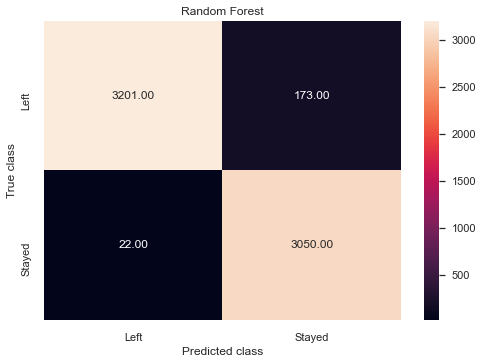

In [164]:
#Confusion Matrix for Random Forest
y_pred = rf.predict(X_test_res)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test_res.ravel())
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

<font color='Green'> 
### <u> Logistic Regression: Precison and Recall Scores <u> ###
</font>

              precision    recall  f1-score   support

         0.0       0.80      0.76      0.78      3223
         1.0       0.77      0.81      0.79      3223

    accuracy                           0.78      6446
   macro avg       0.78      0.78      0.78      6446
weighted avg       0.78      0.78      0.78      6446



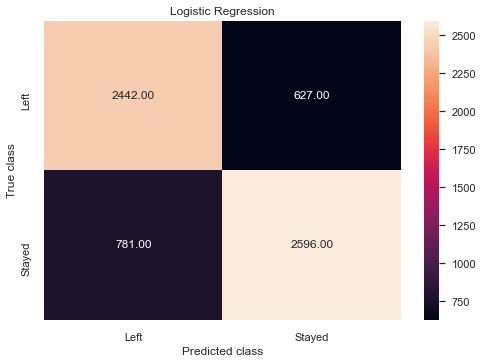

In [165]:
#PRScores for Logistic Regression
print(classification_report(y_test_res.ravel(), logreg.predict(X_test_res)))
#Confusion Matrix for Logistic Regression
logreg_y_pred = logreg.predict(X_test_res)
logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_test_res.ravel())
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')

<font color='Green'> 
### <u> Decision Tree: Precison and Recall Scores <u> ###
</font>

In [166]:
#Precison Recall Scores for Decision Tree
from sklearn.metrics import classification_report
print(classification_report(y_test_res.ravel(), decisiontree.predict(X_test_res)))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      3223
         1.0       0.97      0.95      0.96      3223

    accuracy                           0.96      6446
   macro avg       0.96      0.96      0.96      6446
weighted avg       0.96      0.96      0.96      6446



<font color='Green'> 
### <u> Decision Tree: Confusion Matrix <u> ###
</font>

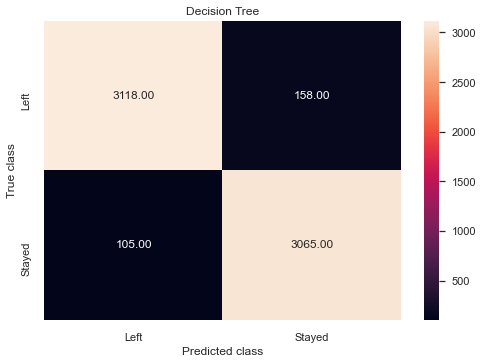

In [167]:
#Confusion Matrix for Decision Tree
y_pred = decisiontree.predict(X_test_res)
dt_cm = metrics.confusion_matrix(y_pred, y_test_res.ravel())
sns.heatmap(dt_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Decision Tree')
plt.savefig('Decision Tree')

<a id = Section823></a>

<font color='Maroon'> 
### <u> 8.2.3 Approach3:- ###  
</font>


### 10 Fold Cross Validation ###

<font color='Green'> 
### <u> Random Forest Classifier <u> ###
</font>

In [168]:
#For Random Forest
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10,shuffle=True,random_state=7)
modelCV = RandomForestClassifier()
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train_res, y_train_res.ravel(), cv=kfold, scoring=scoring)
print("10-fold cross validation average roc_auc score for Random Forest Classifier: %.3f" % (results.mean()))

10-fold cross validation average roc_auc score for Random Forest Classifier: 0.998


<font color='Green'> 
### <u> Support Vector Machine Classifier <u> ###
</font>

In [169]:
#For SVM
kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=7)
modelCV = SVC()
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train_res, y_train_res.ravel(), cv=kfold, scoring=scoring)
print("10-fold cross validation average roc_auc score for SVM Classifier: %.3f" % (results.mean()))

10-fold cross validation average roc_auc score for SVM Classifier: 0.978


<font color='Green'> 
### <u> Decision Tree Classifier <u> ###
</font>

In [170]:
#For Decision Tree
modelCV = DecisionTreeClassifier()
kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=7)
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train_res, y_train_res.ravel(), cv=kfold, scoring=scoring)
print("10-fold cross validation average roc_auc score for Decision Tree Classifier: %.3f" % (results.mean()))

10-fold cross validation average roc_auc score for Decision Tree Classifier: 0.971


<font color='Green'> 
### <u> xgBoost Classifier <u> ###
</font>

In [171]:
#For XGBoost
modelCV = XGBClassifier()
kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=7)
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train_res, y_train_res.ravel(), cv=kfold, scoring=scoring)
print("10-fold cross validation average roc_auc score for XGBoost Classifier: %.3f" % (results.mean()))

10-fold cross validation average roc_auc score for XGBoost Classifier: 0.998


<a id = Section824></a>

<font color='Maroon'> 
### <u> 8.2.4 Approach4:- ###  
</font>

### Hyper parameter Tuning ###


<center><img src="https://github.com/jmps967/INSAID-CapstoneProject-2-ML/blob/master/Image/Hyper%20parameter%20tunning.gif?raw=true" width="1020" height="520" /></center>




GridSearchCV allows use to fine-tune hyper-parameters by searching over specified parameter values for an estimator.         
Fine-tune the Random Forest algorithm's hyper-parameters by cross-validation against the AUC score.

<font color='Green'> 
### <u> Random Forest Classifier <u> ###
</font>

In [172]:
from sklearn.model_selection import GridSearchCV 

rf_classifier = RandomForestClassifier(class_weight = "balanced",
                                       random_state=7)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175],
              'min_samples_split':[2,4,6,8,10],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_depth': [5, 10, 15, 20, 25]}

grid_obj = GridSearchCV(rf_classifier,
                        return_train_score=True,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=10)

grid_fit = grid_obj.fit(X_train_res, y_train_res)
rf_opt = grid_fit.best_estimator_

print('='*20)
print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

best params: RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=175,
                       random_state=7)
best params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 175}
best score: 0.9979965383560006


<font color='Orange'> 
### Testing the Unseen Data:-with Random Forest Classifier ###  
</font>


In [173]:
# wth RandomForestClassifier:
y_scores = grid_obj.predict_proba(df_test)[:,1]

In [174]:
print(y_scores)

[9.11405152e-01 6.85714286e-02 8.85690867e-01 0.00000000e+00
 3.31428571e-01 5.71428571e-03 4.57142857e-02 5.71428571e-02
 0.00000000e+00 0.00000000e+00 1.54285714e-01 7.20000000e-01
 4.22833724e-01 5.71428571e-03 1.54285714e-01 1.71428571e-02
 9.31405152e-01 9.71428571e-02 1.71428571e-02 5.14285714e-02
 9.76535535e-01 3.48548009e-01 6.28571429e-02 6.85714286e-02
 8.11428571e-01 3.42857143e-02 1.42857143e-01 0.00000000e+00
 7.02857143e-01 6.28571429e-02 1.14285714e-02 3.42857143e-02
 0.00000000e+00 1.71428571e-02 0.00000000e+00 1.14285714e-02
 5.71428571e-02 9.65446429e-01 5.71428571e-03 2.47619048e-02
 9.31428571e-01 2.57142857e-01 1.14285714e-02 2.28571429e-02
 1.14285714e-02 1.94237288e-01 9.88571429e-01 0.00000000e+00
 2.97142857e-01 1.43020408e-01 5.71428571e-03 1.14285714e-01
 2.80000000e-01 6.28571429e-02 1.25714286e-01 1.31428571e-01
 2.94353741e-02 5.71428571e-03 1.71428571e-02 6.57142857e-01
 8.57142857e-02 8.45714286e-01 8.62655004e-01 2.28571429e-02
 9.48571429e-01 5.200000

In [175]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

t= 0.5
y_predicted = adjusted_classes(y_scores, t)
print(y_predicted)

[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0]


<font color='Orange'> 
### Feature Importance ###  
</font>

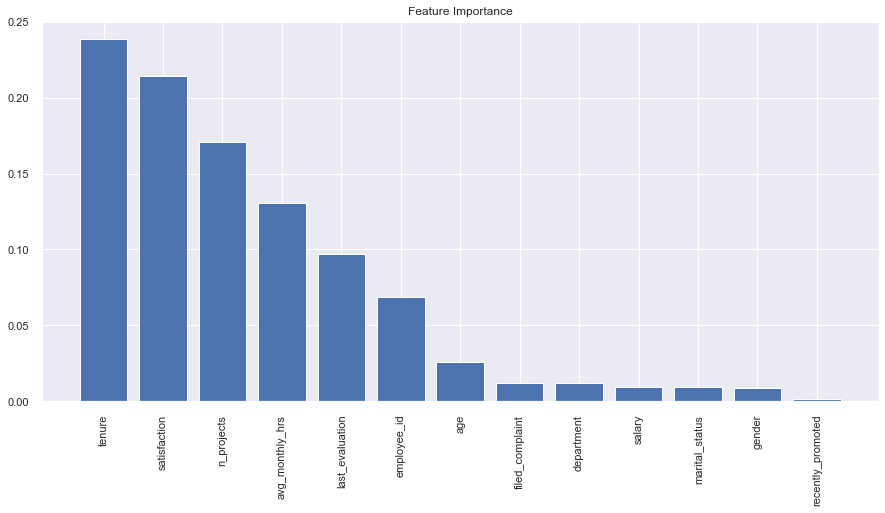

In [176]:
importances = rf_opt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train_res.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train_res.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train_res.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

<font color='red'> 
- The above chart indicates that tenure, satisfaction, no.of projects and avg_working hours are the top features to look after
</font>

<font color='Orange'> 
### Final Model Using Random Forest Classifier ###  
</font>


In [177]:
clf=RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=175,
                       random_state=7)
        
clf.fit(X_train_res,y_train_res.ravel())
ypred_RF =clf.predict_proba(df_test)[:,1]

In [178]:
ypred_RF

array([9.11405152e-01, 6.85714286e-02, 8.85690867e-01, 0.00000000e+00,
       3.31428571e-01, 5.71428571e-03, 4.57142857e-02, 5.71428571e-02,
       0.00000000e+00, 0.00000000e+00, 1.54285714e-01, 7.20000000e-01,
       4.22833724e-01, 5.71428571e-03, 1.54285714e-01, 1.71428571e-02,
       9.31405152e-01, 9.71428571e-02, 1.71428571e-02, 5.14285714e-02,
       9.76535535e-01, 3.48548009e-01, 6.28571429e-02, 6.85714286e-02,
       8.11428571e-01, 3.42857143e-02, 1.42857143e-01, 0.00000000e+00,
       7.02857143e-01, 6.28571429e-02, 1.14285714e-02, 3.42857143e-02,
       0.00000000e+00, 1.71428571e-02, 0.00000000e+00, 1.14285714e-02,
       5.71428571e-02, 9.65446429e-01, 5.71428571e-03, 2.47619048e-02,
       9.31428571e-01, 2.57142857e-01, 1.14285714e-02, 2.28571429e-02,
       1.14285714e-02, 1.94237288e-01, 9.88571429e-01, 0.00000000e+00,
       2.97142857e-01, 1.43020408e-01, 5.71428571e-03, 1.14285714e-01,
       2.80000000e-01, 6.28571429e-02, 1.25714286e-01, 1.31428571e-01,
      

In [179]:
t= 0.5
y_predicted_5 = adjusted_classes(ypred_RF, t)
print(y_predicted_5)

[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0]


In [180]:
t= 0.7
y_predicted_7 = adjusted_classes(ypred_RF, t)
print(y_predicted_7)

[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]


In [181]:
model_eval = pd.read_csv("model_evaluation_table.csv")
# get employee data only for group_id 1001
a = ['1001']
df = model_eval.copy()
df1 = df[df['group_id'].isin(a)]


df1['prediction'] = ypred_RF
df1['threshold_5'] = y_predicted_5
df1['threshold_7'] = y_predicted_7

# Compare reference and predicted at threshold_5:
df1.loc[df1['reference_value'] == df1['threshold_5'], 'mis_match_5'] = 0
df1.loc[df1['reference_value'] != df1['threshold_5'], 'mis_match_5'] = 1
df1.loc[df1['reference_value'] == df1['threshold_7'], 'mis_match_7'] = 0
df1.loc[df1['reference_value'] != df1['threshold_7'], 'mis_match_7'] = 1
print(df1['mis_match_5'].sum())
print(df1['mis_match_7'].sum())
df1.head()

8.0
13.0


,group_id,employee_id,employee_name,reference_value,prediction,threshold_5,threshold_7,mis_match_5,mis_match_7
0,1001,103924,Savita Pandita,1,0.911405,1,1,0.0,0.0
109,1001,112223,Veer Vikram Singh,0,0.068571,0,0,0.0,0.0
192,1001,119045,Abhay Kumar,1,0.885691,1,1,0.0,0.0
203,1001,105922,Vikki Jakkulwar,0,0.000000,0,0,0.0,0.0
204,1001,103297,Sachin Usapkar,1,0.331429,0,0,1.0,1.0


<font color='Green'> 
### XGBClassifier ###  
</font>


In [182]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)
grid_search.fit(X_train_res, y_train_res.ravel())
print('='*20)
print("best params: " + str(grid_search.best_estimator_))
print("best params: " + str(grid_search.best_params_))
print('best score:', grid_search.best_score_)
print('='*20)



Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   14.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:  1.8min
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:  5.4min
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed: 10.4min
[Parallel(n_jobs=10)]: Done 960 out of 960 | elapsed: 13.7min finished


best params: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=180, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)
best params: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 180}
best score: 0.9979225738589591


<font color='Orange'> 
### Testing the Unseen Data:-with XGBClassifier ###  
</font>


In [183]:
y_scores_xgb = grid_obj.predict_proba(df_test)[:,1]

In [184]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

t= 0.5
y_predicted_xgb = adjusted_classes(y_scores_xgb, t)
print(y_predicted_xgb)

[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0]


In [185]:
t= 0.7
y_predicted_xgb = adjusted_classes(y_scores_xgb, t)
print(y_predicted_xgb)

[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]


In [186]:
y_scores_xgb

array([9.11405152e-01, 6.85714286e-02, 8.85690867e-01, 0.00000000e+00,
       3.31428571e-01, 5.71428571e-03, 4.57142857e-02, 5.71428571e-02,
       0.00000000e+00, 0.00000000e+00, 1.54285714e-01, 7.20000000e-01,
       4.22833724e-01, 5.71428571e-03, 1.54285714e-01, 1.71428571e-02,
       9.31405152e-01, 9.71428571e-02, 1.71428571e-02, 5.14285714e-02,
       9.76535535e-01, 3.48548009e-01, 6.28571429e-02, 6.85714286e-02,
       8.11428571e-01, 3.42857143e-02, 1.42857143e-01, 0.00000000e+00,
       7.02857143e-01, 6.28571429e-02, 1.14285714e-02, 3.42857143e-02,
       0.00000000e+00, 1.71428571e-02, 0.00000000e+00, 1.14285714e-02,
       5.71428571e-02, 9.65446429e-01, 5.71428571e-03, 2.47619048e-02,
       9.31428571e-01, 2.57142857e-01, 1.14285714e-02, 2.28571429e-02,
       1.14285714e-02, 1.94237288e-01, 9.88571429e-01, 0.00000000e+00,
       2.97142857e-01, 1.43020408e-01, 5.71428571e-03, 1.14285714e-01,
       2.80000000e-01, 6.28571429e-02, 1.25714286e-01, 1.31428571e-01,
      

<font color='Orange'> 
### Final Model using XGBClassifier ###  
</font>


In [187]:
from numpy import nan

clf= XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=180, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)
        
clf.fit(X_train_res,y_train_res.ravel())
ypred =clf.predict_proba(df_test)[:,1]

In [188]:
print(ypred)

[9.7501999e-01 2.3201064e-03 9.8513281e-01 2.0667652e-04 4.4139172e-03
 7.1641908e-04 1.0719738e-03 1.6395132e-03 1.0327022e-03 6.6539826e-05
 3.1773930e-03 9.6025467e-01 3.0370085e-02 8.6190033e-04 5.9908262e-04
 3.7453917e-04 9.7234207e-01 9.2317187e-04 3.0104199e-04 1.7598338e-03
 9.9769163e-01 2.0581480e-02 1.3108230e-03 2.0349582e-03 9.2828035e-01
 1.3221634e-03 3.7037494e-04 1.3279592e-04 9.4462156e-01 8.4106205e-04
 2.4664498e-04 2.1294025e-03 3.9910275e-04 2.3777397e-04 6.5683627e-05
 1.4767816e-03 1.5727886e-03 9.9842775e-01 1.2563410e-03 3.0718835e-03
 9.9966538e-01 3.7642095e-02 1.5083547e-03 7.4592163e-04 6.8292233e-05
 3.2257792e-03 9.9964535e-01 2.2478384e-04 5.2590019e-01 3.4609207e-04
 2.4909759e-04 5.7036517e-04 3.9142221e-02 6.5979565e-04 2.7626812e-02
 3.6570782e-04 4.0296203e-04 2.7795514e-04 6.7168870e-04 9.9756372e-01
 1.5958203e-03 9.8367000e-01 9.6364313e-01 3.4923875e-04 9.9966156e-01
 7.6047528e-01 4.0731678e-04 9.0875161e-01 3.0402723e-04 9.9354845e-01
 9.533

In [189]:
def adjusted_classes(ypred, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in ypred]

t= 0.5
y_predicted_5 = adjusted_classes(ypred, t)
print(y_predicted_5)

[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0]


In [190]:
t= 0.7
y_predicted_7 = adjusted_classes(ypred, t)
print(y_predicted_7)

[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0]


In [191]:
model_eval = pd.read_csv("model_evaluation_table.csv")
# get employee data only for group_id 1001
a = ['1001']
df = model_eval.copy()
df1 = df[df['group_id'].isin(a)]


df1['prediction'] = ypred
df1['threshold_5'] = y_predicted_5
df1['threshold_7'] = y_predicted_7

# Compare reference and predicted at threshold_5:
df1.loc[df1['reference_value'] == df1['threshold_5'], 'mis_match_5'] = 0
df1.loc[df1['reference_value'] != df1['threshold_5'], 'mis_match_5'] = 1
df1.loc[df1['reference_value'] == df1['threshold_7'], 'mis_match_7'] = 0
df1.loc[df1['reference_value'] != df1['threshold_7'], 'mis_match_7'] = 1
print(df1['mis_match_5'].sum())
print(df1['mis_match_7'].sum())
df1_xgb = df1.copy()

9.0
8.0



<a id = Section83></a>

<font color='green'> 
## 8.3 Handling Base(Balance) Data ##
</font>


<a id = Section831></a>

<font color='Maroon'> 
### <u> 8.3.1 Approach5:- ###  
</font>

In [192]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.25,
                                                    random_state=7)
print("Number of samples in X_train dataset: ", X_train.shape)
print("Number of samples in y_train dataset: ", y_train.shape)
print("Number of samples in X_test dataset: ", X_test.shape)
print("Number of samples in y_test dataset: ", y_test.shape)


Number of samples in X_train dataset:  (10590, 13)
Number of samples in y_train dataset:  (10590,)
Number of samples in X_test dataset:  (3531, 13)
Number of samples in y_test dataset:  (3531,)


In [193]:
# get a stacking ensemble of models
def get_stacking():
# define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
# define meta learner model
    level1 = LogisticRegression()
# define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

>lr 0.828 (0.016)
>knn 0.957 (0.007)
>cart 0.954 (0.007)
>svm 0.970 (0.004)
>bayes 0.860 (0.018)
>stacking 0.984 (0.004)


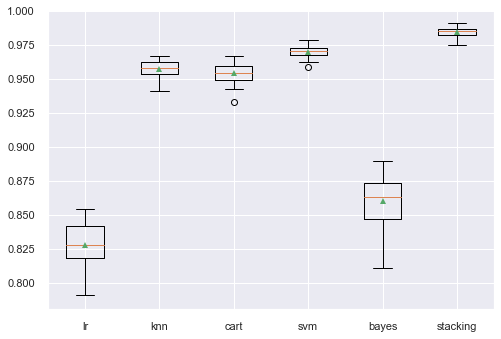

In [194]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()
    return models# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()
    return models

# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# define dataset
X = X_train
y = y_train
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

<font color='Green'> 
### KNN Classifier ###  
</font>


K-Nearest Neighbours is one of the most __basic yet essential classification algorithms__ in Machine Learning. It belongs to the __supervised learning__ domain and finds intense application in __pattern recognition__, __data mining__ and __intrusion detection__.

It is widely disposable in real-life scenarios since it is non-parametric, meaning, it __does not make__ any __underlying assumptions__ about the distribution of data.

- __Supervised learning__, in the context machine learning, is a type of system in which both __input__ and __desired output__ data are provided. Input and output data are __labelled for classification__ to provide a learning basis for future data processing.

<center><img src="https://github.com/jmps967/INSAID-CapstoneProject-2-ML/blob/master/Image/KNN.png?raw=true" width="520" height="250" /></center>

In [195]:
from sklearn.model_selection import GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='roc_auc')
grid.fit(X, y)
# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.9585014826223489
{'n_neighbors': 12}
KNeighborsClassifier(n_neighbors=12)


In [196]:
params_knn = {'n_neighbors':[5,6,7,8,9,10,12,13,14,15,16,17,18,19,20],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute']}
grid = GridSearchCV(knn, params_knn, cv=10, scoring='roc_auc')
grid.fit(X, y)
# examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.9628240543125806
{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 16, 'weights': 'distance'}


In [197]:
knn = KNeighborsClassifier(n_neighbors=16, weights='distance')
knn.fit(X, y)
ypred_KNN = grid.predict_proba(df_test)[:,1]

In [198]:
print(ypred_KNN)

[1.         0.         0.87727467 0.         0.81433468 0.
 0.50023144 0.         0.         0.         0.         1.
 0.51179639 0.         0.         0.         0.93737612 0.
 0.         0.         1.         0.93858878 0.0606439  0.
 0.31124593 0.1203593  0.         0.         1.         0.
 0.06065079 0.06321496 0.         0.17501869 0.         0.
 0.         0.94114655 0.         0.06211456 0.50422243 0.37600532
 0.11577715 0.19324954 0.         0.06875693 0.94222487 0.
 0.         0.06185714 0.         0.         0.         0.05895936
 0.24264249 0.         0.         0.         0.         0.93623406
 0.         0.25362002 0.56337487 0.         1.         0.63080356
 0.         0.81236976 0.         0.87812113 0.06444631 0.
 0.         0.         0.88014784 0.06255752 0.         0.
 0.06430728 0.         0.44825276 0.56981432 0.237023   0.75920762
 0.06191327 0.         0.         0.         0.50311673 0.11100379
 0.94100564 0.59633099 0.3205624  0.75677181 0.07617092 0.
 0.     

In [199]:
t= 0.5
y_predicted_knn_5 = adjusted_classes(ypred_KNN, t)


In [200]:
print(y_predicted_knn_5)

[1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0]


In [201]:
t= 0.7
y_predicted_knn_7 = adjusted_classes(ypred_KNN, t)
print(y_predicted_knn_7)

[1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]


In [202]:
model_eval = pd.read_csv("model_evaluation_table.csv")
# get employee data only for group_id 1001
a = ['1001']
df = model_eval.copy()
df1 = df[df['group_id'].isin(a)]


df1['prediction'] = ypred_KNN
df1['threshold_5'] = y_predicted_knn_5
df1['threshold_7'] = y_predicted_knn_7

# Compare reference and predicted at threshold_5:
df1.loc[df1['reference_value'] == df1['threshold_5'], 'mis_match_5'] = 0
df1.loc[df1['reference_value'] != df1['threshold_5'], 'mis_match_5'] = 1
df1.loc[df1['reference_value'] == df1['threshold_7'], 'mis_match_7'] = 0
df1.loc[df1['reference_value'] != df1['threshold_7'], 'mis_match_7'] = 1
print(df1['mis_match_5'].sum())
print(df1['mis_match_7'].sum())
df1.head()

10.0
14.0


,group_id,employee_id,employee_name,reference_value,prediction,threshold_5,threshold_7,mis_match_5,mis_match_7
0,1001,103924,Savita Pandita,1,1.000000,1,1,0.0,0.0
109,1001,112223,Veer Vikram Singh,0,0.000000,0,0,0.0,0.0
192,1001,119045,Abhay Kumar,1,0.877275,1,1,0.0,0.0
203,1001,105922,Vikki Jakkulwar,0,0.000000,0,0,0.0,0.0
204,1001,103297,Sachin Usapkar,1,0.814335,1,1,0.0,0.0


<font color='Green'> 
### Random Forest Classifier ###  
</font>


In [203]:
from sklearn.model_selection import GridSearchCV 

rf_classifier = RandomForestClassifier(class_weight = "balanced",
                                       random_state=7)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175],
              'min_samples_split':[2,4,6,8,10],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_depth': [5, 10, 15, 20, 25]}

grid_obj = GridSearchCV(rf_classifier,
                        return_train_score=True,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=10)

grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

print('='*20)
print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

best params: RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=175,
                       random_state=7)
best params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 175}
best score: 0.991877797373933


In [204]:
y_scores = grid_obj.predict_proba(df_test)[:,1]

In [205]:
t= 0.5
y_predicted_5 = adjusted_classes(y_scores, t)


In [206]:
print(y_predicted_5)

[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0]


In [207]:
t= 0.7
y_predicted_7 = adjusted_classes(y_scores, t)


In [208]:
model_eval = pd.read_csv("model_evaluation_table.csv")
# get employee data only for group_id 1001
a = ['1001']
df = model_eval.copy()
df1 = df[df['group_id'].isin(a)]


df1['prediction'] = y_scores
df1['threshold_5'] = y_predicted_5
df1['threshold_7'] = y_predicted_7

# Compare reference and predicted at threshold_5:
df1.loc[df1['reference_value'] == df1['threshold_5'], 'mis_match_5'] = 0
df1.loc[df1['reference_value'] != df1['threshold_5'], 'mis_match_5'] = 1
df1.loc[df1['reference_value'] == df1['threshold_7'], 'mis_match_7'] = 0
df1.loc[df1['reference_value'] != df1['threshold_7'], 'mis_match_7'] = 1
print(df1['mis_match_5'].sum())
print(df1['mis_match_7'].sum())
df1.head()

10.0
16.0


,group_id,employee_id,employee_name,reference_value,prediction,threshold_5,threshold_7,mis_match_5,mis_match_7
0,1001,103924,Savita Pandita,1,0.971429,1,1,0.0,0.0
109,1001,112223,Veer Vikram Singh,0,0.017143,0,0,0.0,0.0
192,1001,119045,Abhay Kumar,1,0.925714,1,1,0.0,0.0
203,1001,105922,Vikki Jakkulwar,0,0.011429,0,0,0.0,0.0
204,1001,103297,Sachin Usapkar,1,0.302857,0,0,1.0,1.0


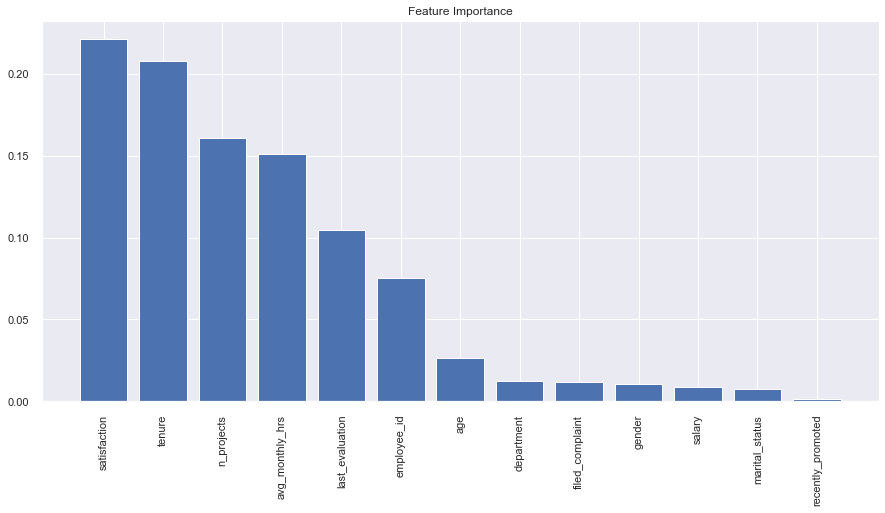

In [209]:
importances = rf_opt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

<font color='Green'> 
### XGBClassifier ###  
</font>


In [210]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)
grid_search.fit(X_train, y_train)
print('='*20)
print("best params: " + str(grid_search.best_estimator_))
print("best params: " + str(grid_search.best_params_))
print('best score:', grid_search.best_score_)
print('='*20)



Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   11.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:  1.2min
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:  3.5min
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:  6.8min
[Parallel(n_jobs=10)]: Done 960 out of 960 | elapsed:  9.0min finished


best params: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=180, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)
best params: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 180}
best score: 0.9932182005518971


In [211]:
clf= XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=180, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)
        
clf.fit(X_train,y_train)
ypred =clf.predict_proba(df_test)[:,1]

In [212]:
ypred.shape

(100,)

In [213]:
t= 0.5
y_predicted_5 = adjusted_classes(ypred, t)


In [214]:
print(y_predicted_5)

[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0]


In [215]:
t= 0.7
y_predicted_7 = adjusted_classes(ypred, t)


In [216]:
print(y_predicted_7)

[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0]


In [217]:
model_eval = pd.read_csv("model_evaluation_table.csv")
# get employee data only for group_id 1001
a = ['1001']
df = model_eval.copy()
df1 = df[df['group_id'].isin(a)]


df1['prediction'] = ypred
df1['threshold_5'] = y_predicted_5
df1['threshold_7'] = y_predicted_7

# Compare reference and predicted at threshold_5:
df1.loc[df1['reference_value'] == df1['threshold_5'], 'mis_match_5'] = 0
df1.loc[df1['reference_value'] != df1['threshold_5'], 'mis_match_5'] = 1
df1.loc[df1['reference_value'] == df1['threshold_7'], 'mis_match_7'] = 0
df1.loc[df1['reference_value'] != df1['threshold_7'], 'mis_match_7'] = 1
print(df1['mis_match_5'].sum())
print(df1['mis_match_7'].sum())
df1.head()

9.0
10.0


,group_id,employee_id,employee_name,reference_value,prediction,threshold_5,threshold_7,mis_match_5,mis_match_7
0,1001,103924,Savita Pandita,1,0.980369,1,1,0.0,0.0
109,1001,112223,Veer Vikram Singh,0,0.007160,0,0,0.0,0.0
192,1001,119045,Abhay Kumar,1,0.982667,1,1,0.0,0.0
203,1001,105922,Vikki Jakkulwar,0,0.001457,0,0,0.0,0.0
204,1001,103297,Sachin Usapkar,1,0.130536,0,0,1.0,1.0


In [218]:
model_eval = pd.read_csv("model_evaluation_table.csv")

In [219]:
model_eval.head()

,group_id,employee_id,employee_name,reference_value,prediction,threshold_5,threshold_7
0,1001,103924,Savita Pandita,1,0.00,0,0
1,1003,108058,Swati Kurdekar,0,0.11,0,0
2,1003,107889,Hamla Ma,0,0.00,0,0
3,1003,116407,Bhawna Negi,0,0.04,0,0
4,1003,110213,Parul Jain,0,0.00,0,0


In [220]:
model_eval.shape

(300, 7)

In [221]:
# fetch the predicted data frame from XGB model executed earlier:
df1_xgb.head()

,group_id,employee_id,employee_name,reference_value,prediction,threshold_5,threshold_7,mis_match_5,mis_match_7
0,1001,103924,Savita Pandita,1,0.975020,1,1,0.0,0.0
109,1001,112223,Veer Vikram Singh,0,0.002320,0,0,0.0,0.0
192,1001,119045,Abhay Kumar,1,0.985133,1,1,0.0,0.0
203,1001,105922,Vikki Jakkulwar,0,0.000207,0,0,0.0,0.0
204,1001,103297,Sachin Usapkar,1,0.004414,0,0,1.0,1.0


In [222]:
grp1001_leaving = df1_xgb[(df1_xgb.threshold_5 ==1)]

In [223]:
grp1001_leaving

,group_id,employee_id,employee_name,reference_value,prediction,threshold_5,threshold_7,mis_match_5,mis_match_7
0,1001,103924,Savita Pandita,1,0.975020,1,1,0.0,0.0
192,1001,119045,Abhay Kumar,1,0.985133,1,1,0.0,0.0
211,1001,127419,Easwar Sudheer,1,0.960255,1,1,0.0,0.0
216,1001,115767,Aamir Saif,1,0.972342,1,1,0.0,0.0
220,1001,115060,Nirmala S,1,0.997692,1,1,0.0,0.0
224,1001,100400,Praveen Aileni,1,0.928280,1,1,0.0,0.0
228,1001,127312,Sai Krishna,1,0.944622,1,1,0.0,0.0
237,1001,113851,Neelesh Thallam,1,0.998428,1,1,0.0,0.0
240,1001,100405,Rahil Ghani,1,0.999665,1,1,0.0,0.0
246,1001,138635,Anand Dagare,1,0.999645,1,1,0.0,0.0


In [224]:
grp1001_leaving.shape

(25, 9)

In [225]:
High_Risk = grp1001_leaving[(grp1001_leaving.prediction > 0.7)]

In [226]:
High_Risk.shape

(24, 9)

In [227]:
High_Risk

,group_id,employee_id,employee_name,reference_value,prediction,threshold_5,threshold_7,mis_match_5,mis_match_7
0,1001,103924,Savita Pandita,1,0.975020,1,1,0.0,0.0
192,1001,119045,Abhay Kumar,1,0.985133,1,1,0.0,0.0
211,1001,127419,Easwar Sudheer,1,0.960255,1,1,0.0,0.0
216,1001,115767,Aamir Saif,1,0.972342,1,1,0.0,0.0
220,1001,115060,Nirmala S,1,0.997692,1,1,0.0,0.0
224,1001,100400,Praveen Aileni,1,0.928280,1,1,0.0,0.0
228,1001,127312,Sai Krishna,1,0.944622,1,1,0.0,0.0
237,1001,113851,Neelesh Thallam,1,0.998428,1,1,0.0,0.0
240,1001,100405,Rahil Ghani,1,0.999665,1,1,0.0,0.0
246,1001,138635,Anand Dagare,1,0.999645,1,1,0.0,0.0


In [228]:
Low_Medium_Risk = grp1001_leaving[(grp1001_leaving.prediction < 0.7)]
Low_Medium_Risk.shape

(1, 9)

In [229]:
Low_Medium_Risk

,group_id,employee_id,employee_name,reference_value,prediction,threshold_5,threshold_7,mis_match_5,mis_match_7
248,1001,111864,Sneha Parkar,0,0.5259,1,0,1.0,0.0


In [230]:
model_eval = pd.read_csv("model_evaluation_table.csv")
# get employee data only for group_id 1001
a = ['1001']
df1 = df[df['group_id'].isin(a)]

model_eval['prediction'] = model_eval.employee_id.map(dict(zip(df1.employee_id, df1.prediction)))
model_eval['threshold_5'] = model_eval.employee_id.map(dict(zip(df1.employee_id, df1.threshold_5)))
model_eval['threshold_7'] = model_eval.employee_id.map(dict(zip(df1.employee_id, df1.threshold_7)))
model_eval.to_csv("model_eval_prob.csv",index=False)

In [231]:
df1.prediction

0      0.0
109    1.0
192    0.0
203    1.0
204    1.0
      ... 
295    1.0
296    1.0
297    1.0
298    1.0
299    1.0
Name: prediction, Length: 100, dtype: float64

In [232]:
model_eval

,group_id,employee_id,employee_name,reference_value,prediction,threshold_5,threshold_7
0,1001,103924,Savita Pandita,1,0.0,0,0
1,1003,108058,Swati Kurdekar,0,1.0,1,1
2,1003,107889,Hamla Ma,0,1.0,1,1
3,1003,116407,Bhawna Negi,0,1.0,1,1
4,1003,110213,Parul Jain,0,1.0,1,1
...,...,...,...,...,...,...,...
295,1001,116666,Pankaj Kale,0,1.0,1,1
296,1001,106422,Bhimarao Kamidi,0,1.0,1,1
297,1001,107889,Hamla Ma,0,1.0,1,1
298,1001,117622,Usamah Moin,0,1.0,1,1


<font color='brown'> 
## <u> Evaluating the Predicted results:- <u> ##
</font>

### From all the analysis done so far, it as been observed that the best performing model to be ensemble based **XGBoost Classifier** with the data being considered as Imbalanced ###


- The XGB model is able to predict with a count of **9 mis-matches** when **probability threshold** as **0.5** and **8 mismatches** when **probability threshold** is **0.7**

- From the prediction :- it is found above that 
    - **25 out of 100** employees belonging to group 1001 are likely to **leave**
    - Out of **25** : - 
        - **24** are having probability **> 0.7** , falls into **HIGH risk** category    
        - Only **1** as **low-medium** risk with probability **< 0.7**             

**Advised to the company Human Resources:-** 
- To take immediate measures to do the needful to retain the employees

**Suggestions:-** 

HR to find out more about these employees and take the following actions:                                         
1) Predicted to leave employees are **high** performers with **high** performance rating: 
- Reward/appreciate their efforts with either performance bonus amount or a certification of merit or check for a possibility     for their promotion or work out a plan for their promotion keeping them in confidence. 
- This will give confidence to the employee valued and gets to visualize his/her possibility for potential growth. Both on       personal and professional front.                                             
- From the data observation, it is likely that these employees are **young** and being paid **less** salary. 
    - For Younger people, salary plays special importance, company must ensure that their **pay package** is revised and are         at par with industry standards.                                                                                                                     
2) Predicted to leave employees are **low or medium performers**, with **less ambition** and **not hungry for growth**
- Have a fruitful discussion with them the reasons for their inadequate performance and see how the company can help them in improving their performance
- Give exposure of trainings and a systematic talent development program for such individuals   


**<u> Key pointers are :- <u>** 
- Engage with employees
- Understand employee pain points
- Measures pain pointers and address them


<a id = Section9></a>

<font color='brown'> 
# **9. Conclusion**
</font>


**<u> During analyzing the data  below parameters found contributing to employee attrition significantly:- <u>**              
    
    
**1.Tenure:-** The data indicates Employee average experience of **3-4** years to be the high in-demand category. Most demanding set of people in the industry, as their expectation towards remuneration is not that high so as not impacting much to cost to the company

**2.Satisfaction:-**  Pointers from scatter plots on employees leaving exposes the following:   
-	satisfaction level is 
    - going down with the increase in avg monthly hours
    - high with moderate working hours
    - medium with less no of working hours
    - going down even if high rating and high avg. no.of working hours.
    - average for those who are having less work and medium rating

*Focus on champions who have 3Highs are still leaving: -*

-	high rating
-	Working hard with high no.of working hours 
-	high satisfaction

**3.Number of Projects:-** employees leaving who 
-	worked upon around 2 to 3 projects in the span of 3 t 4 years of gaining work experience.
-	developed skill on the projects which is in high demand in market 
-	gaining skills lured by attractive offers 
-	who are intelligent, young and hardworking – but demand on working too many hours of work 

**4. Work Hours:-** Analysis across the various departments of the company indicates 
-	departments requiring high number of work hours
-	departments having high attrition. 

**5.Last Evaluation / Performance Rating:-** The data of employees leaving indicates that 
-	highly rated employees are leaving are huge as there is no recognition for their efforts and contributions

**6. Age- Gender- Marital Status:-**
-	young, male, unmarried employees in the age group pf 22-29 years to constitute a big chunk of employees leaving

**7. Complaints filed:-** pain points for employees 
-	either they are complaining, grumbling and leaving silently or forced to leave
-	indicates that company management is turning a deaf ear to its employee calls

**8. Department:-** 
-	highest attrition is in Sales department followed by Engineering and Support

**9. Salary:-** 
-	Majority who are leaving found to be paid less or medium salaries. 
-	Very few employees being paid high are found to leave.

**10. Promotion in last 5 years:-** The dataset shows that employee contributions are not getting 

**<u> Consultancy Analysis and Feedback Note:- <u>**
    

The reason for attrition with the **highly** rated **high** performing champions appears to be due to
-	lack of promotion and 
-	inadequate remuneration.
They are 
-	young, 
-	ambitious, 
-	performers 
-	who are looking for a purpose for their contribution. 

Especially, 
- Sales department across the world is known for its volatile nature. If the sales employees are not able to meet their sales targets, inspite of doing their best, that will lead to their frustration. 
- In addition to that, if their **efforts** fail to **fetch** them **recognition and growth** that they look out for, they would start looking out for better options, which appears to be the case here as well.
- With such frustrating atmosphere in the current organization, if their superior performance is noticeable to recruiters of other companies, they are lured with attractive offers. 


<font color='maroon'> 
**Important points for Management:-**
- The parameters analysed shed a **lot of light** on the **operational aspects** of the company. 
- If company wants to survive and to be in better position in the market, this analysis should be an **eye opener** to the company **management** to plan for the Employee Retention given in **next section**
</font>

   
Retention Plan/Suggestions:
===========================
    

<font color='maroon'> 
**1) Working towards Employee Motivation: -**
</font>
- Managers should keep their employees motivated by acknowledging their performance with rating and possibility of increase in   pay and promotion. Give or create opportunities for growth and concrete success of the employees.
  Good employees (the ones who are dedicated to the company—the ones the company really wants to keep) want the opportunity to   grow and not just maintain momentum.

<font color='maroon'> 
Try to make possible advancement for employees like job advancement, promotion, professional development. Generally, people who  goal oriented they are more focused on work instead of a dead-end are generally more motivated. 
So, management must focus on this to retain exemplary employees.
</font>

<font color='maroon'> 
**2) Working towards Employee Work-life Balance: -**
</font>

- Data indicate comanay requirement is for long working hours impacting work-life balance. Also data shows that a good number of **slogging workers** are being taken for granted
- Workout on headcount by department to address worklife balance. 
- Keep no.of projects  or potential business in mind and plan hiring process. **Relevant and right number** of resources,provide them **right set of tools** and **training** to enable them to contribute **efficiently** and **be productive**


<font color='maroon'> 
Company should follow strict work ethics towards working hours, schedules across the departments so that employees do not get drained out.
</font>

<font color='maroon'> 
**3) Working towards Effective Communication & Feedback :-**
</font>

- Some chunk of people who are complaining at the time of leaving the company indicates that the management is **turning a deaf ear** to their pain. 
- The company/management to **wake up** and start **communicating effectively** with its employee

<font color='maroon'> 
Show empathy , care and value towards employees feedback and addressing their pain points.
</font>

<font color='maroon'> 
**4) Working towards Competitive Remuneration :-**
</font>

- Most of the employees who left the company, having one of the reason was under paid. 
- The pay-scale across the departments should be made competitive and at par with industry standards.

<font color='maroon'> 
This should be addressed on priority
</font>

<font color='Green'> 
### <u> Major Contributer for Notebook <u> ###
</font>

- Veena Srivatsa
- Dheeraj Maurya
- Jigna Thacker
- Chayan Paria
- Sruthi S Kumar
- Anjali Batra
- Amar Seth



<center><img src="https://github.com/jmps967/INSAID-CapstoneProject-2-ML/blob/master/Image/THank%20you.jpg?raw=true" width="1020" height="520" /></center>